# **CIS 5450 Final Porject: Comprehensive Analysis of Cardiovascular Disease: Bridging Population and Individual Perspectives**

Feite Zhu, Xiran Hu, Ziyu Pan

# **Part 0: Introduction**

Cardiovascular disease (CVD) is known as the leading cause of global death and one of the most serious health problems throughout the world. CVD led to near 18 million deaths, 330 million years of life lost and 35.6 million years lived with disability in 2017 worldwide. Meanwhile, it was projected that CVD would be the cause of more than 23 million deaths in 2030 around the world. Accurate estimation of disease risk factors plays a key role in crafting effective public health strategies and mitigating the disease's extensive burden.

**Reference:** Amini, M., Zayeri, F. & Salehi, M. Trend analysis of cardiovascular disease mortality, incidence, and mortality-to-incidence ratio: results from global burden of disease study 2017. BMC Public Health 21, 401 (2021). https://doi.org/10.1186/s12889-021-10429-0

We have carried out an extensive analysis of CVD at both the population and individual levels. Our approach and thought process are illustrated in the  following picture.

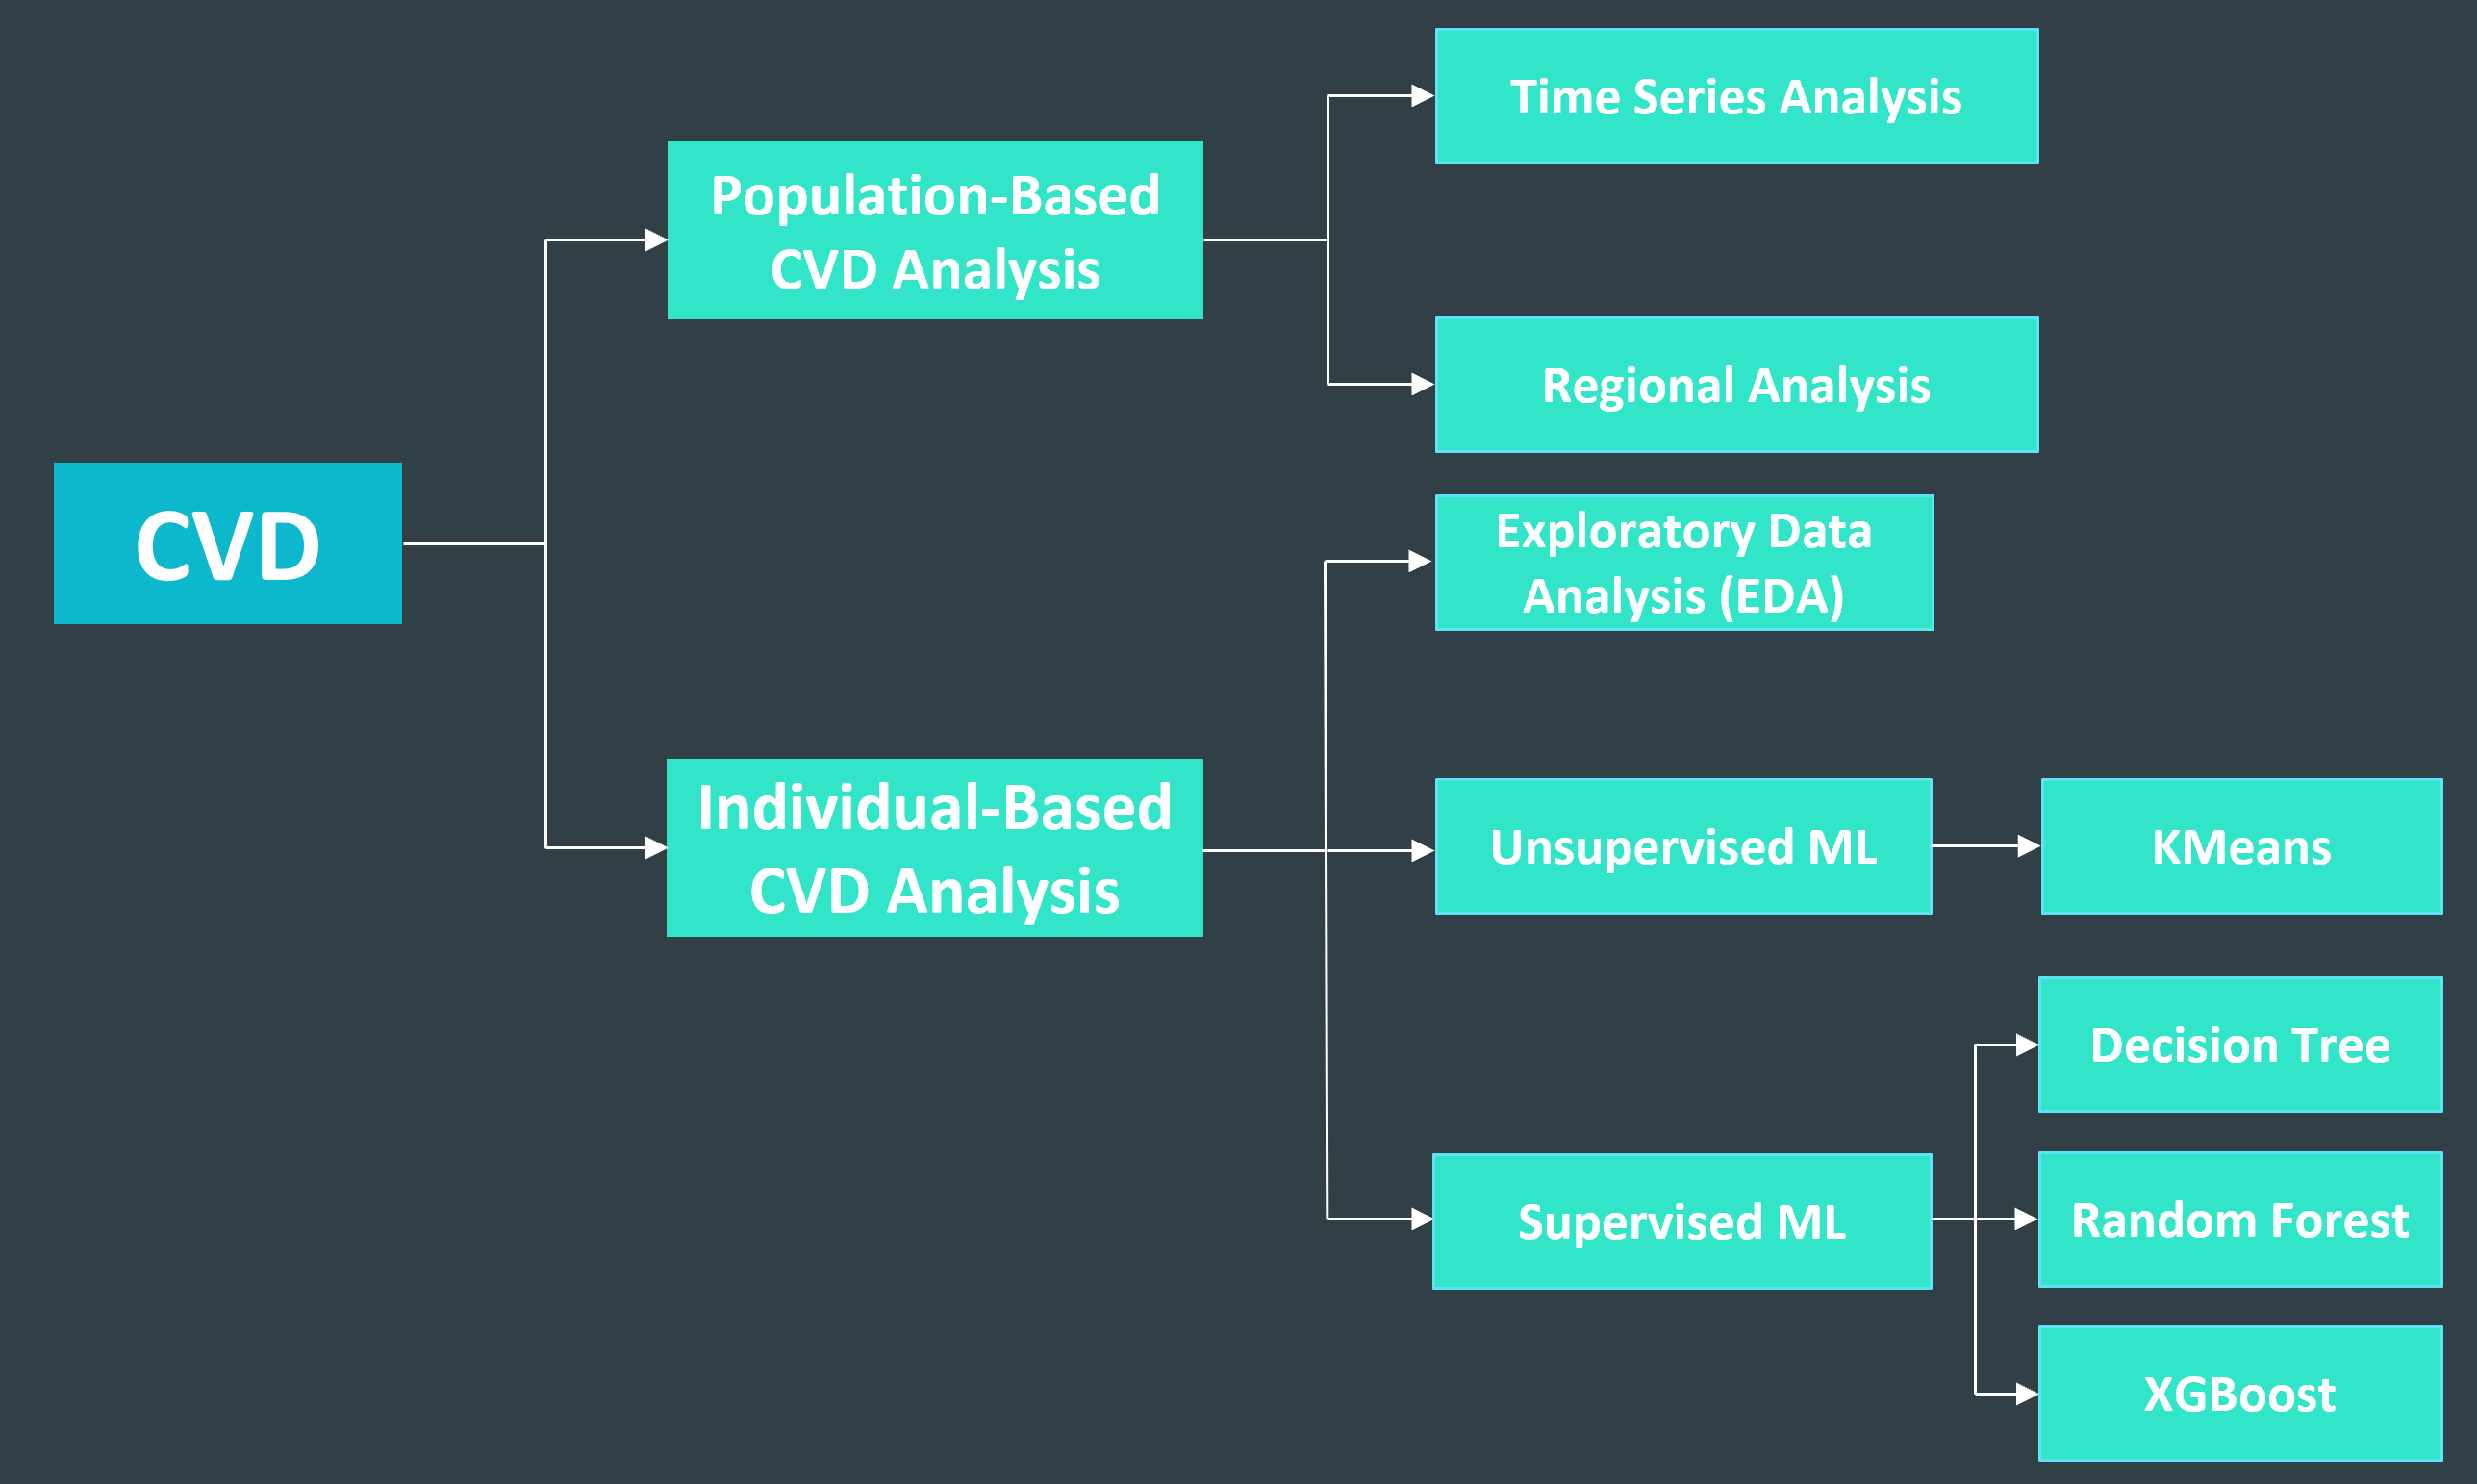

# **Part 1 - Population-Based Cardiovascular Disease(CVD) Analysis**


In [ ]:
# Install Basemap Package
!pip install basemap basemap-data-hires
# Install Dash Package
!pip install dash

In [ ]:
# Import Packages and Libraries
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from collections import Counter

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Machine Learning, Modeling, and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, f1_score, make_scorer, recall_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Geographical Mapping
from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Web Scraping and Data Acquisition
import requests
from lxml import html

# Date and Time Manipulation
import datetime as dt

# Dashboard and Interactive Application
from dash import Dash, dcc, html, Input, Output

# File Handling and Miscellaneous
import json
import glob
import os
import re
import math

# Google Colab Specific
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/CIS545/final proj

/content/drive/MyDrive/CIS545/final proj


## 1.1 Acquisition and Processing of U.S. CVD Mortality Data

### 1.1.1 Download Dataset

The dataset we used to analyze Population-Based CVD is National Cardiovascular Disease Surveillance Data downloaded from [the U.S. Government's Open Data](https://catalog.data.gov/dataset/national-vital-statistics-system-nvss-national-cardiovascular-disease-surveillance-data).

This is one of the datasets provided by the National Cardiovascular Disease Surveillance System. The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States.

In [ ]:
# URL of the CSV file
url = 'https://data.cdc.gov/api/views/kztq-p2jf/rows.csv?accessType=DOWNLOAD'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file in write-binary mode
    with open('cardiovascular_Surveillance.csv', 'wb') as file:
        # Write the content to the file
        file.write(response.content)
else:
    print("Failed to retrieve the file")

In [ ]:
# read csv data
ts = pd.read_csv("cardiovascular_Surveillance.csv")

### 1.1.2 Data Wrangling

In [ ]:
# Create a dictionary to hold unique values of each column
unique_values = {}

# Iterate over each column in the DataFrame
for column in ts.columns:
    unique_values[column] = ts[column].unique()

unique_values

{'RowId': array(['NVSS~2000~1~NV001~OVR01~Age-Standardized',
        'NVSS~2000~1~NV001~OVR01~Crude', 'NVSS~2000~1~NV001~GEN01~Crude',
        ..., 'NVSS~2020~59~NV008~RAC04~Age-Standardized',
        'NVSS~2020~59~NV008~RAC07~Age-Standardized',
        'NVSS~2020~59~NV008~RAC07~Crude'], dtype=object),
 'YearStart': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]),
 'LocationAbbr': array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
        'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
        'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'US'], dtype=object),
 'LocationDesc': array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'Washington, DC', 'Florida

We only want to explore mortality rate of CVD in the U.S., so we only keep related columns.

In [ ]:
CVDmotality = ts[ts['Question']=='Major cardiovascular disease mortality rate among US adults (18+); NVSS']
CVDmotality_clean = CVDmotality[['YearStart','Data_Value_Type','Data_Value_Unit','Data_Value','LocationDesc',
                           'Geolocation','Break_Out'
                           ]]

CVDmotality_clean.head()

,YearStart,Data_Value_Type,Data_Value_Unit,Data_Value,LocationDesc,Geolocation,Break_Out
0,2000,Age-Standardized,"Rate per 100,000",508.2,Alabama,POINT (-86.63186076 32.84057112),Overall
1,2000,Crude,"Rate per 100,000",525.6,Alabama,POINT (-86.63186076 32.84057112),Overall
2,2000,Crude,"Rate per 100,000",514.9,Alabama,POINT (-86.63186076 32.84057112),Male
3,2000,Age-Standardized,"Rate per 100,000",550.4,Alabama,POINT (-86.63186076 32.84057112),Male
4,2000,Age-Standardized,"Rate per 100,000",471.7,Alabama,POINT (-86.63186076 32.84057112),Female


There are 2 types of data in `Data_Value_Type`column, *age-standardized* and *crude* data.

* Crude data refers to the raw figures that have not been adjusted for any factors, including age. In the context of health statistics, crude rates are calculated by dividing the total number of cases by the total population. They can be misleading when comparing populations with different age structures. For instance, a population with a larger proportion of elderly individuals may naturally have a higher crude mortality rate, simply because mortality rates increase with age.

* Age-standardized data are adjusted to account for differences in age distribution among different populations. This standardization allows for a more accurate comparison between populations. This is done by applying the observed age-specific rates of a population to a standard age structure (often a census population).

For our analysis of CVD mortality over different time periods, which involves varying total populations, we have decided to exclude all crude data.

In [ ]:
# exclude all crude data and keep all the age-standardized data
CVDmotality_standard = CVDmotality_clean[CVDmotality_clean.Data_Value_Type == 'Age-Standardized'].reset_index(drop=True)

The `Data_Value` represents the number of deaths per 100,000 people. We express this feature as the `Mortality_Rate` by dividing the value by 100,000.

In [ ]:
# Transfer Data_Value to Mortality_Rate
CVDmotality_standard[['Mortality_Rate']] = CVDmotality_standard[['Data_Value']]/100000
CVDmotality_standard = CVDmotality_standard[['YearStart','Data_Value_Type','Mortality_Rate','LocationDesc',
                           'Geolocation','Break_Out'
                           ]].reset_index(drop=True)
CVDmotality_standard.head(10)

,YearStart,Data_Value_Type,Mortality_Rate,LocationDesc,Geolocation,Break_Out
0,2000,Age-Standardized,0.005082,Alabama,POINT (-86.63186076 32.84057112),Overall
1,2000,Age-Standardized,0.005504,Alabama,POINT (-86.63186076 32.84057112),Male
2,2000,Age-Standardized,0.004717,Alabama,POINT (-86.63186076 32.84057112),Female
3,2000,Age-Standardized,0.004898,Alabama,POINT (-86.63186076 32.84057112),Non-Hispanic White
4,2000,Age-Standardized,0.006028,Alabama,POINT (-86.63186076 32.84057112),Non-Hispanic Black
5,2000,Age-Standardized,0.000919,Alabama,POINT (-86.63186076 32.84057112),Hispanic
6,2000,Age-Standardized,0.001184,Alabama,POINT (-86.63186076 32.84057112),Other
7,2000,Age-Standardized,0.003023,Alaska,POINT (-147.722059 64.84507996),Overall
8,2000,Age-Standardized,0.003220,Alaska,POINT (-147.722059 64.84507996),Male
9,2000,Age-Standardized,0.002818,Alaska,POINT (-147.722059 64.84507996),Female


In the `Break_Out` column, the `Overall` category represents the total mortality rate from CVD. Given our focus on the holistic view, we will only retain and analyze the `Overall` data.

In [ ]:
# keep the Overall data
CVDmotality_standard = CVDmotality_standard[CVDmotality_standard['Break_Out'] == 'Overall'].reset_index(drop=True)
CVDmotality_standard.head(10)

,YearStart,Data_Value_Type,Mortality_Rate,LocationDesc,Geolocation,Break_Out
0,2000,Age-Standardized,0.005082,Alabama,POINT (-86.63186076 32.84057112),Overall
1,2000,Age-Standardized,0.003023,Alaska,POINT (-147.722059 64.84507996),Overall
2,2000,Age-Standardized,0.003624,Arizona,POINT (-111.7638113 34.86597028),Overall
3,2000,Age-Standardized,0.005090,Arkansas,POINT (-92.27449074 34.74865012),Overall
4,2000,Age-Standardized,0.004266,California,POINT (-120.9999995 37.63864012),Overall
5,2000,Age-Standardized,0.003462,Colorado,POINT (-106.1336109 38.84384076),Overall
6,2000,Age-Standardized,0.004346,Connecticut,POINT (-72.64984095 41.56266102),Overall
7,2000,Age-Standardized,0.004234,Delaware,POINT (-75.57774117 39.00883067),Overall
8,2000,Age-Standardized,0.005138,"Washington, DC",POINT (-77.03196113 38.89037139),Overall
9,2000,Age-Standardized,0.004202,Florida,POINT (-81.92896054 28.93204038),Overall


In [ ]:
# See if there are any nulls
CVDmotality_standard.isnull().sum()

YearStart           0
Data_Value_Type     0
Mortality_Rate      0
LocationDesc        0
Geolocation        21
Break_Out           0
dtype: int64

In [ ]:
# Explore null rows
null_values = CVDmotality_standard[CVDmotality_standard.isnull().any(axis=1)]
null_values

,YearStart,Data_Value_Type,Mortality_Rate,LocationDesc,Geolocation,Break_Out
51,2000,Age-Standardized,0.004528,United States,NaN,Overall
103,2001,Age-Standardized,0.004404,United States,NaN,Overall
155,2002,Age-Standardized,0.004324,United States,NaN,Overall
207,2003,Age-Standardized,0.004164,United States,NaN,Overall
259,2004,Age-Standardized,0.003906,United States,NaN,Overall
311,2005,Age-Standardized,0.003816,United States,NaN,Overall
363,2006,Age-Standardized,0.003609,United States,NaN,Overall
415,2007,Age-Standardized,0.003424,United States,NaN,Overall
467,2008,Age-Standardized,0.003328,United States,NaN,Overall
519,2009,Age-Standardized,0.003149,United States,NaN,Overall


For our analysis, we find that data specific to individual states is sufficient and provides the necessary detail for our purposes. Thus, we consider to drop the `United States` rows, which lack `Geolocation`	informationis.

In [ ]:
# drop null
CVDmotality_standard = CVDmotality_standard[CVDmotality_standard.LocationDesc != 'United States']
CVDmotality_standard

,YearStart,Data_Value_Type,Mortality_Rate,LocationDesc,Geolocation,Break_Out
0,2000,Age-Standardized,0.005082,Alabama,POINT (-86.63186076 32.84057112),Overall
1,2000,Age-Standardized,0.003023,Alaska,POINT (-147.722059 64.84507996),Overall
2,2000,Age-Standardized,0.003624,Arizona,POINT (-111.7638113 34.86597028),Overall
3,2000,Age-Standardized,0.005090,Arkansas,POINT (-92.27449074 34.74865012),Overall
4,2000,Age-Standardized,0.004266,California,POINT (-120.9999995 37.63864012),Overall
...,...,...,...,...,...,...
1086,2020,Age-Standardized,0.002561,Virginia,POINT (-78.45789046 37.54268067),Overall
1087,2020,Age-Standardized,0.002234,Washington,POINT (-120.4700108 47.52227863),Overall
1088,2020,Age-Standardized,0.003217,West Virginia,POINT (-80.71264013 38.6655102),Overall
1089,2020,Age-Standardized,0.002689,Wisconsin,POINT (-89.81637074 44.39319117),Overall


In [ ]:
# See if there are any duplicates
CVDmotality_standard.duplicated().sum()

0

In [ ]:
# Save data to Drive
CVDmotality_standard.to_csv('CVDmotality_standard.csv', index=False)
CVDmotality_standard.to_csv('/content/drive/MyDrive/CIS545/final proj/CVDmotality_standard.csv', index=False)

Here is the Google Drive link for CVDmotality_standard dataset: https://drive.google.com/file/d/1-1TtQ7n23jn3T7_My2BXHWqi8KUrIcV2/view?usp=sharing

## 1.2 Time Series Analysis

### 1.2.1 Visual Testing for Stationarity: Box Plot Analysis

In [ ]:
# read data
cvd_mortality_data = pd.read_csv('/content/drive/MyDrive/CIS545/final proj/CVDmotality_standard.csv')

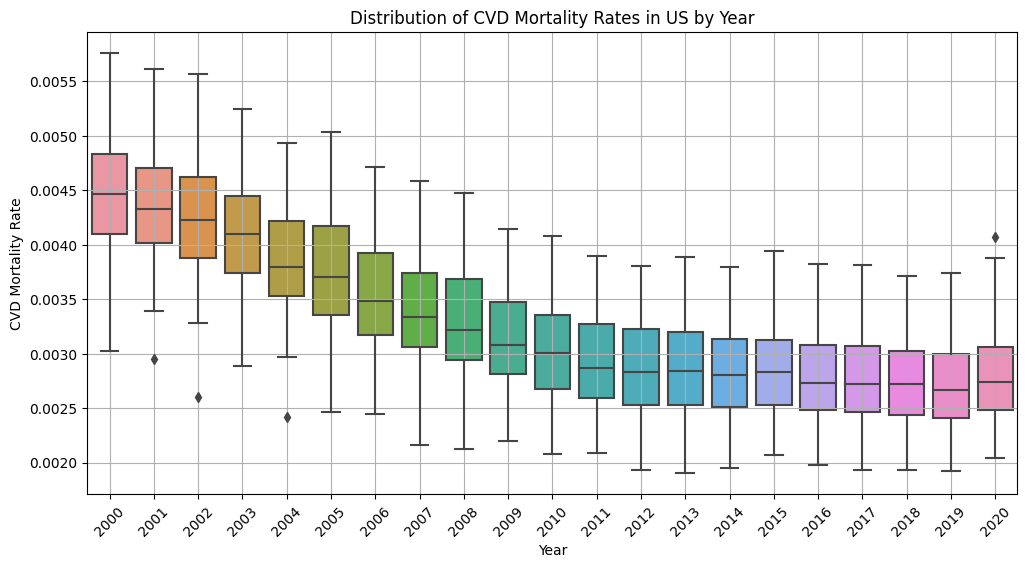

In [ ]:
# Boxplot to observe the distribution of mortality rates over the years
plt.figure(figsize=(12, 6))
sns.boxplot(x='YearStart', y='Mortality_Rate', data=cvd_mortality_data)
plt.title('Distribution of CVD Mortality Rates in US by Year')
plt.xlabel('Year')
plt.ylabel('CVD Mortality Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Takeaway**:

1. The median CVD mortality rate have decreased over time, with some fluctuation in spread and outliers. This suggests that the mortality rate is not stationary.



### 1.2.2 Statistical Testing for Stationarity: Augmented Dickey-Fuller Method


In [ ]:
# Use the aggregated yearly data for this test
yearly_mortality_data = cvd_mortality_data.groupby('YearStart')['Mortality_Rate'].mean()

# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(yearly_mortality_data)

# Extracting the results
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Number of Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}

adf_result

{'ADF Statistic': -2.502493260581145,
 'p-value': 0.11486886552992193,
 'Number of Lags Used': 7,
 'Number of Observations Used': 13,
 'Critical Values': {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095}}

**Takeaways**:
1. Since the ADF statistic (-2.5025) is higher than any of the critical values, and the p-value (0.1149) is higher than 0.05, we cannot reject the null hypothesis. This suggests that the time series is non-stationary. This conclusion further affirms the non-stationary nature of the series.

2. According to the study published in NCBI(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5268076/), the observed decline in mortality rates is attributed to significant advancements in prevention and treatment strategies. Key contributing factors include a steep decrease in cigarette smoking rates, as well as enhancements in the management and control of hypertension.







### 1.2.3 Five-Year Forecasting Using the Exponential Smoothing Model

In [ ]:
# Exponential Smoothing Model
model_exp_smoothing = ExponentialSmoothing(yearly_mortality_data, trend='add', seasonal=None, seasonal_periods=None)
fitted_model_exp_smoothing = model_exp_smoothing.fit()
# Extracting AIC and BIC
aic = fitted_model_exp_smoothing.aic
bic = fitted_model_exp_smoothing.bic

aic, bic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(-399.4059452353948, -395.2278554845011)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


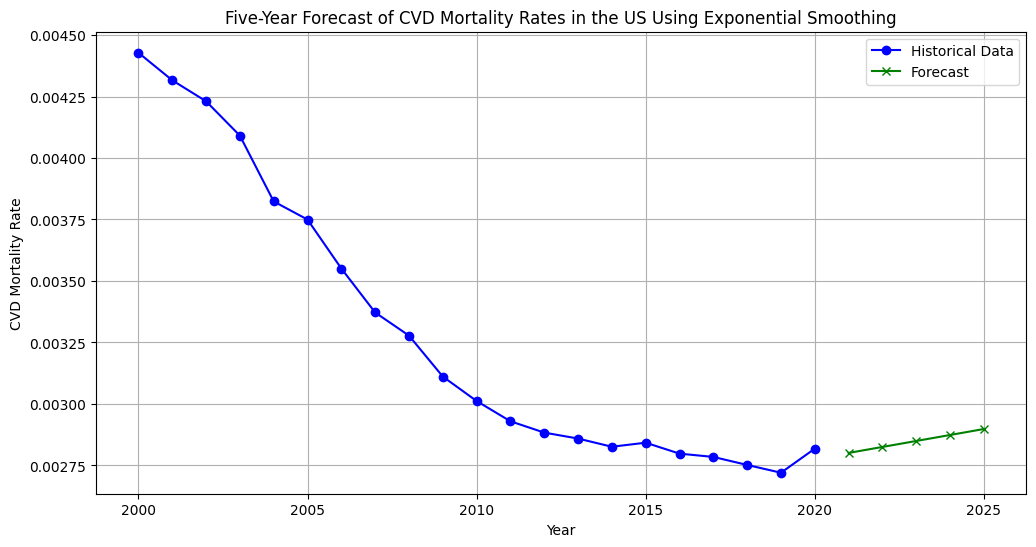

21    0.002801
22    0.002825
23    0.002849
24    0.002874
25    0.002898
dtype: float64

In [ ]:
# Generating forecasts using the Exponential Smoothing model
# Forecasting for the next 5 years
yearly_mortality_data = cvd_mortality_data.groupby('YearStart')['Mortality_Rate'].mean()
forecast_years = 5
forecasts = fitted_model_exp_smoothing.forecast(forecast_years)

# Creating a time series for the forecast years
forecast_years_series = pd.Series(range(yearly_mortality_data.index[-1] + 1,
                                        yearly_mortality_data.index[-1] + 1 + forecast_years))

# Plotting the historical data and the forecasts
plt.figure(figsize=(12, 6))
yearly_mortality_data.plot(label='Historical Data', marker='o',color='blue')
plt.plot(forecast_years_series, forecasts, label='Forecast', marker='x',color='green')
plt.title('Five-Year Forecast of CVD Mortality Rates in the US Using Exponential Smoothing')
plt.xlabel('Year')
plt.ylabel('CVD Mortality Rate')
plt.legend()
plt.grid(True)
plt.show()

forecasts

**Takeaways**:

We used Exponential Smoothing model to predict CVD mortality rates in U.S. for the years 2021 to 2025.

1. **Model Performance:** The AIC (Akaike Information Criterion) of the model is -399, and the BIC (Bayesian Information Criterion) of the model is -395. The lower AIC and BIC values suggest that the model is a good fit for the historical data.

2. **Forecasted Mortality Rates:**
*   Year 2021: 0.002801
*   Year 2022: 0.002825
*   Year 2023: 0.002849
*   Year 2024: 0.002874
*   Year 2025: 0.002898

3. **Comparison with Actual Data:**
Based on data from external sources (see link below), the actual CVD mortality rates for 2021 and 2022 were 0.00264 and 0.00277, respectively. Our model predicted values of 0.002801 and 0.002825 for these years, showing a slightly higher but still acceptably close estimation.

4. **Error Margin Consideration:** The slight differences between the forecasted and actual values could be attributed to unforeseen factors such as changes in health policies, particularly those in response to COVID-19, or economic shifts.

**References:**

Comparative Data Sources:


*   [Statista: U.S. States by Heart Disease Deaths](https://www.statista.com/statistics/320799/top-us-states-by-heart-disease-deaths/?gclid=CjwKCAiA98WrBhAYEiwA2WvhOu8DDlELRFcyu2pTKGU4ZqlN0l2RRertWWQHdkFIk0QD3CEKzuj_2xoCQWgQAvD_BwE#statisticContainer)
*   [CDC Report on Mortality Rates](https://www.cdc.gov/mmwr/volumes/72/wr/mm7218a3.htm.)

## 1.3 Regional Analysis

### 1.3.1 Comparative Analysis of CVD Mortality Rates Across U.S. States

Select location and mortality rate, and then take average of 21 years

In [ ]:
# group by State and keep mortality value and coordinates of states
map_data = cvd_mortality_data.groupby('LocationDesc').agg({'Mortality_Rate':'mean','Geolocation':'first'}).reset_index()

# remove strings from coordinates column
map_data['Geolocation'] = map_data['Geolocation'].str.replace('POINT ','')

# replace white space with comma
map_data['Geolocation'] = map_data['Geolocation'].str.replace(' ',',')

Extract center latitude and longtitude data from `Geolocation`

In [ ]:
# select state name and its corresponding coordinates
temp = map_data[['LocationDesc', 'Geolocation']].set_index('LocationDesc')

# Function to convert geolocation string to a dictionary
def convert_geolocation(geo_str):
    if isinstance(geo_str, str):
        # Use regex to extract the longitude and latitude
        match = re.match(r'\((-?\d+\.?\d*),(-?\d+\.?\d*)\)', geo_str)
        if match:
            # Convert the strings to float and create a dictionary
            return {"lat": float(match.group(2)), "lon": float(match.group(1))}
    # Return None for latitude and longitude if input is not a valid string
    return {"lat": None, "lon": None}

# Apply the conversion to each row in the DataFrame
state_coordinates = temp['Geolocation'].apply(convert_geolocation)

# Convert the Series of dictionaries to a DataFrame
state_coordinates_df = pd.DataFrame(list(state_coordinates)).set_index(state_coordinates.index).reset_index()
state_coordinates_df.rename(columns={'index': 'LocationDesc'}, inplace=True)

# Display the first few rows
state_coordinates_df.head()


,LocationDesc,lat,lon
0,Alabama,32.840571,-86.631861
1,Alaska,64.845080,-147.722059
2,Arizona,34.865970,-111.763811
3,Arkansas,34.748650,-92.274491
4,California,37.638640,-121.000000


Prepare data for drawing heatmap

In [ ]:
# Merge coordinates data with mortality data value on state name
heatmap_data = map_data.merge(state_coordinates_df, on="LocationDesc")
heatmap_data.head()

,LocationDesc,Mortality_Rate,Geolocation,lat,lon
0,Alabama,0.004102,"(-86.63186076,32.84057112)",32.840571,-86.631861
1,Alaska,0.002243,"(-147.722059,64.84507996)",64.845080,-147.722059
2,Arizona,0.002733,"(-111.7638113,34.86597028)",34.865970,-111.763811
3,Arkansas,0.004023,"(-92.27449074,34.74865012)",34.748650,-92.274491
4,California,0.003138,"(-120.9999995,37.63864012)",37.638640,-121.000000


In [ ]:
# check the top 5 cvd mortality state
heatmap_data.sort_values(by='Mortality_Rate',ascending=False)

,LocationDesc,Mortality_Rate,Geolocation,lat,lon
23,Mississippi,0.004410,"(-89.53803082,32.7455101)",32.745510,-89.538031
35,Oklahoma,0.004210,"(-97.52107021,35.47203136)",35.472031,-97.521070
0,Alabama,0.004102,"(-86.63186076,32.84057112)",32.840571,-86.631861
3,Arkansas,0.004023,"(-92.27449074,34.74865012)",34.748650,-92.274491
48,West Virginia,0.003865,"(-80.71264013,38.6655102)",38.665510,-80.712640
17,Louisiana,0.003856,"(-92.44568007,31.31266064)",31.312661,-92.445680
47,"Washington, DC",0.003850,"(-77.03196113,38.89037139)",38.890371,-77.031961
41,Tennessee,0.003801,"(-85.77449091,35.68094058)",35.680941,-85.774491
24,Missouri,0.003777,"(-92.56630005,38.63579078)",38.635791,-92.566300
21,Michigan,0.003741,"(-84.71439027,44.66131954)",44.661320,-84.714390


Draw interactive heatmap using `folium`


In [ ]:
# Calculate the average latitude and longitude
average_latitude = heatmap_data['lat'].mean()
average_longitude = heatmap_data['lon'].mean()

# Create the map centered at the average location
map = folium.Map(location=[average_latitude, average_longitude], zoom_start=6)

# Add Heatmap layer
heat_data = [[row['lat'], row['lon'], row['Mortality_Rate']] for index, row in heatmap_data.iterrows()]
HeatMap(heat_data).add_to(map)

# Display the map
map

**Takeaways:**

1. The mortality rate of CVD is higher in the east of United States than in the west, indicating that there is significant geographic variance in CVD mortality in US.
2. The largest concentration of states with high CVD mortality are Mississippi, Arkansas, Oklahoma, all locating in the southeast of US.

The underlying causes of this geographic disparity have not been thoroughly investigated. However, it may be associated with regional variations in the prevalence of high blood pressure, high cholesterol, and diabetes. These health risk factors, in turn, could be influenced by socio-economic factors such as median household income. Additionally, state-specific policies, like taxes on sugary drinks, and the availability of nutritional options at farmers markets versus convenience stores, might also play a significant role in these differences.

### 1.3.2 Annual Distribution of CVD Mortality Rates Across U.S. States

To take a closer look at CVD mortality data from 2000 to 2020, we used `dash` and `plotly` to draw a series of choropleth maps. A choropleth map is a type of statistical thematic map that uses pseudocolor and it provides an easy way to visualize how CVD mortality rates varies across a geographic area or show the level of variability within a region.

Prepare data of every year in every state

In [ ]:
# group by State and keep mortality rate and coordinates of states
yearly = cvd_mortality_data.groupby(['YearStart','LocationDesc']).agg({'Mortality_Rate':'first'}).reset_index()
print(yearly.describe())

# create a list of years
years = np.arange(2000,2021)
years

        YearStart  Mortality_Rate
count  1071.00000     1071.000000
mean   2010.00000        0.003294
std       6.05813        0.000739
min    2000.00000        0.001905
25%    2005.00000        0.002718
50%    2010.00000        0.003189
75%    2015.00000        0.003783
max    2020.00000        0.005759


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

Download and read GeoJSON file for drawing choropleth map

In [ ]:
# URL of the GeoJSON file
url = 'https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the response content as JSON (GeoJSON is JSON)
    geojson_data = response.json()

    # Optionally, save the GeoJSON data to a file
    with open('us_state.json', 'w') as file:
        json.dump(geojson_data, file)
else:
    print(f"Failed to retrieve data: status code {response.status_code}")

# Load or define GeoJSON data
with open('us_state.json', 'r') as file:
    geojson_data = json.load(file)


Draw choropleth maps

In [ ]:
# Initialize the Dash app
app = Dash(__name__)

# A Div is a container that can hold other HTML components
app.layout = html.Div([
    # create a header (H4)
    html.H4('US Cardiovascular Disease Mortality Rate Distribution by Year'),
    # create a paragraph element
    html.P("Select Year:"),
    # create a dropdown menu for year selection
    dcc.Dropdown(
        id='year-selector',
        options=[{'label': year, 'value': year} for year in years],
        value=years[0]
    ),
    # create a graph component
    dcc.Graph(id="graph"),
])

# callback to update the 'figure' attribute of the 'graph' component
# whenever the 'value' attribute of the 'year-selector' component changes
@app.callback(
    Output("graph", "figure"),
    [Input("year-selector", "value")])

# define callback function
def display_choropleth(selected_year):
    # Filter data based on the selected year
    filtered_df = yearly[yearly['YearStart'] == selected_year]

    # creates a choropleth map using Plotly
    fig = px.choropleth(filtered_df,
                        geojson=geojson_data,
                        color="Mortality_Rate", # sets the color of the map regions based on the 'Data_Value'
                        locations="LocationDesc", # column in the DataFrame corresponds to the GeoJSON features
                        featureidkey="properties.NAME", # specify the key in the GeoJSON data to match with the locations
                        projection="natural earth", # set the map projection
                        range_color=[0, 500],# define the range of values for the color scale # max(filtered_df['Data_Value'])
                        color_continuous_scale="turbo"  # Change the color scale
    )
    # fit the map bounds to the locations and makes some geo components invisible
    fig.update_geos(fitbounds="locations", visible=False)
    # remove any margins around the plot for a cleaner look
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    return fig

# Run the app
app.run_server(debug=True)


Since the colab environment cannot support exporting the result of the Dash app, we could not keep the above result in this notebook. However you can rerun the notebook to try this interactive graph, or watch the presentation video of this part from [this link](https://drive.google.com/file/d/10JWwzG_dKc-Er0wmu55U0b29QbpFR7k_/view?usp=sharing).

Here we also provide several screenshots of the result.

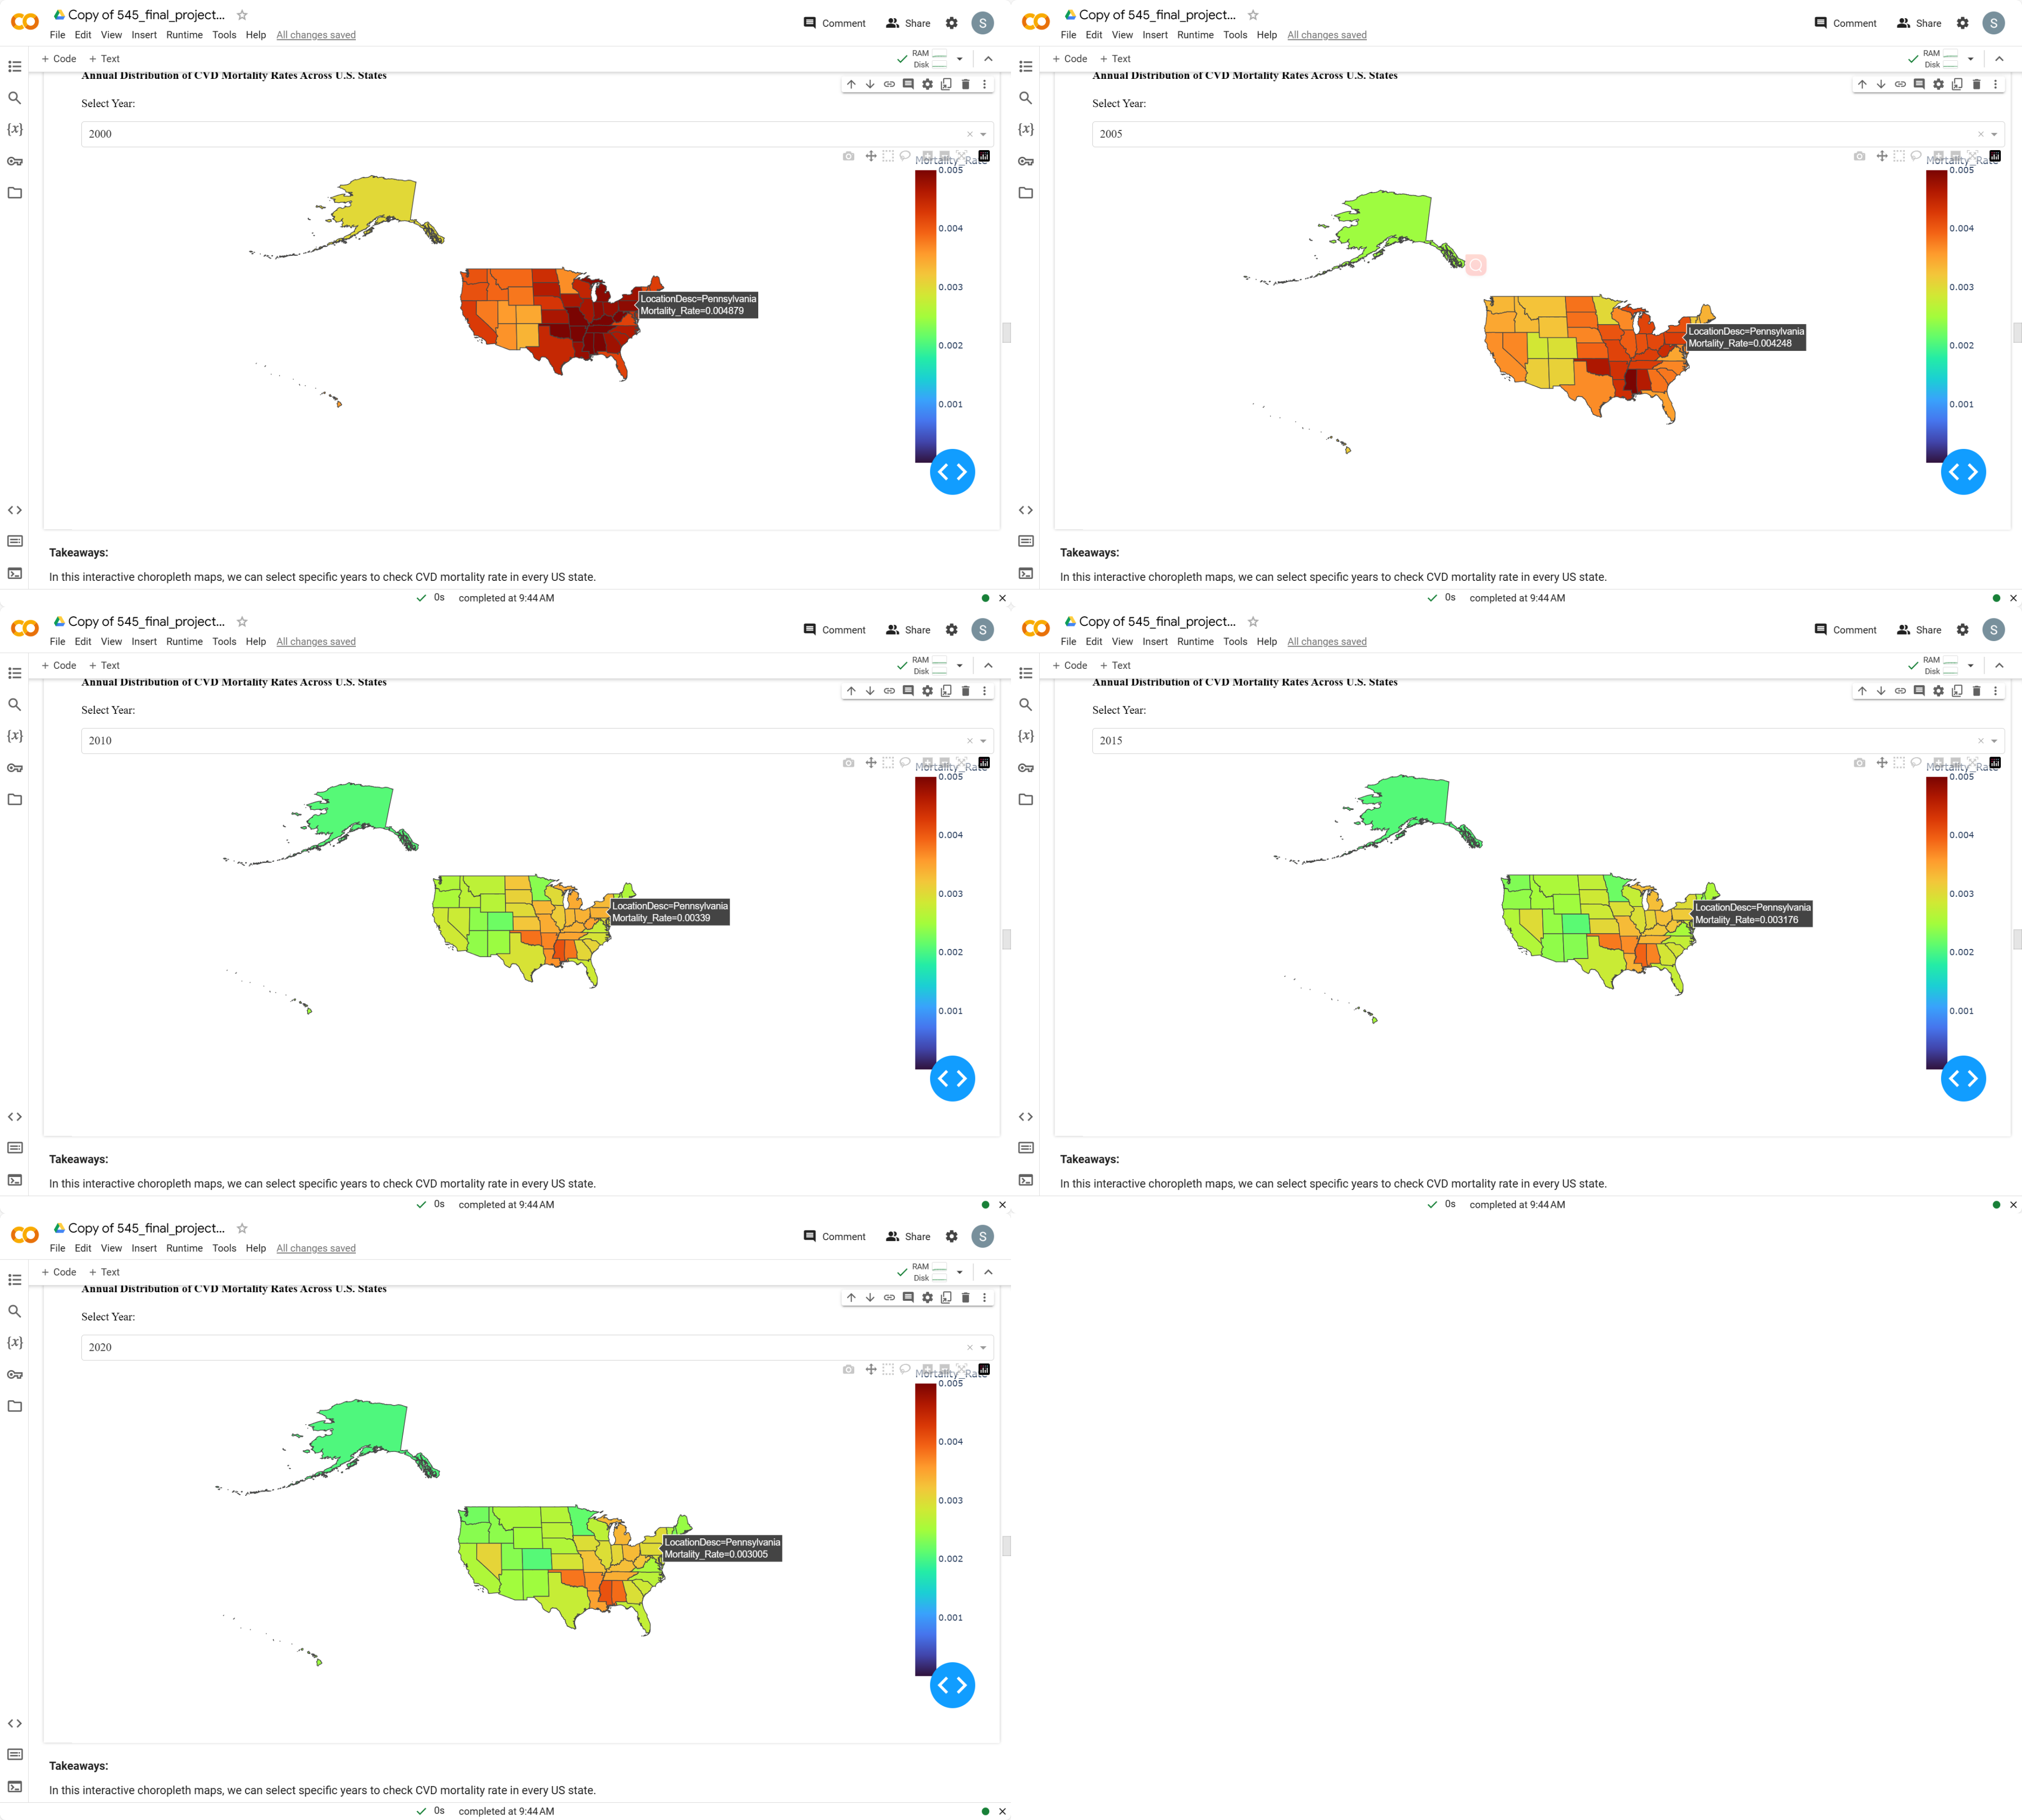

**Takeaways:**

In this interactive choropleth maps, we can select specific years to check CVD mortality in every US state.

* The color on the map intuitively indicates how serious the problem of CVD was in each state that year - the redder the color, the higher the rate of people dying from CVD.

* When hovering the pointer over a particular state, it triggers a pop-up box with the name of the state and its corresponding CVD mortality rate.

As we set the maximum metric of colorbar to 500, we can directly compare the fluctuations or trends in CVD mortality rates of individual states over the 21-year period.

1. It is observed that the color on the map gets greener as time goes on, which means that the CVD mortality rate of US overall went down over 21 years.

2. In Pennsylvania, there has been a notable decline in the CVD mortality rate, dropping from from 0.0049 in the year 2000, to 0.0034 by 2010, and further to 0.0030 in 2020.

3. The states located in the South-Central region of America consistently exhibit the highest rates of CVD mortality throughout the two-decade span.

# **Part 2 - Individual-Based Cardiovascular Disease(CVD) Analysis**


Datasets : CVD_cleaned.csv (course staff proposed datasets)

https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset/data

We have downloaded the dataset for our analysis and stored it on Google Drive. To ensure easy access, we've also provided a link to the Drive folder: https://drive.google.com/file/d/1Ij8yPNqEYA10_oaIJDSuZNnKj56Lm9Xc/view?usp=sharing.

## 2.1 Exploratory Data Analysis (EDA)

### 2.1.1 Read dataset

In [ ]:
# Read the csv file and save it to a dataframe
df = pd.read_csv("/content/drive/MyDrive/CIS545/final proj/CVD_cleaned.csv")

### 2.1.2 Descriptive Statistical Analysis

In [ ]:
# Check out the first five rows
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

The dataset contains 308,854 rows (individuals) and 19 columns (features).

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


Basic info for the numeric variables (7 numeric variables in total):

*   **Height_(cm):** Height of the individual in centimeters. Mean height is approximately 170 cm, with a minimum of 91 cm and a maximum of 241 cm.
*   **Weight_(kg):** Weight of the individual in kilograms. Mean weight is approximately 81.65 kg, with a minimum of 24.95 kg and a maximum of 293.02 kg.
*   **BMI:** Body Mass Index of the individual. BMI = weight (kg)\height (m)^2. Mean BMI is approximately 27.44, with a minimum of 12.02 and a maximum of 99.33.
*   **Alcohol_Consumption:** Amount of alcohol consumption. Mean alcohol consumption is approximately 1.00, with a minimum of 0 and a maximum of 30.
*   **Fruit_Consumption:** Amount of fruit consumption. Mean fruit consumption is approximately 30, with a minimum of 0 and a maximum of 120.
*   **Green_Vegetables_Consumption:** Amount of green vegetable consumption.  Mean green vegetables consumption is approximately 12, with a minimum of 0 and a maximum of 128.
*   **FriedPotato_Consumption:** Amount of fried potato consumption. Mean fried potato consumption is approximately 4, with a minimum of 0 and a maximum of 128.

In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
General_Health,308854,5,Very Good,110395
Checkup,308854,5,Within the past year,239371
Exercise,308854,2,Yes,239381
Heart_Disease,308854,2,No,283883
Skin_Cancer,308854,2,No,278860
Other_Cancer,308854,2,No,278976
Depression,308854,2,No,246953
Diabetes,308854,4,No,259141
Arthritis,308854,2,No,207783
Sex,308854,2,Female,160196


Basic info for the categorical variables (12 categorical variables in total):

*   **General_Health:** This is a measure of the individual's overall health. It contains 5 unique categories like "Poor", "Fair", "Good", "Very Good", "Excellent". The most common category is "Good".
*   **Checkup:** This represents the last time the individual had a medical checkup. It has 5 unique categories such as "Within past year (anytime less than 12 months ago)", "Within past 2 years (1 year but less than 2 years ago)", "Within past 5 years (2 years but less than 5 years ago)", "5 or more years ago", "Never". The most common category is "Within past year (anytime less than 12 months ago)".
*   **Exercise:** This indicates whether the individual exercises or not. It has 2 unique values - "Yes" and "No". The most common value is "Yes".
*   **Heart_Disease:** This indicates whether the individual has heart disease or not. It has 2 unique values - "Yes" and "No". The most common value is "No".
*   **Skin_Cancer:** This indicates whether the individual has skin cancer or not. It has 2 unique values - "Yes" and "No". The most common value is "No".
*   **Other_Cancer:** This indicates whether the individual has any other type of cancer. It has 2 unique values - "Yes" and "No". The most common value is "No".
*   **Depression:** This indicates whether the individual suffers from depression. It has 2 unique values - "Yes" and "No". The most common value is "No".
*   **Diabetes:** This indicates whether the individual has diabetes. It has 2 unique values - "Yes" and "No". The most common value is "No".
*   **Arthritis:** This indicates whether the individual has arthritis. It has 2 unique values - "Yes" and "No". The most common value is "No".
*   **Sex:** This represents the gender of the individual. It has 2 unique values - "Male" and "Female". The most common value is "Female".
*   **Age_Category:** This represents the age category of the individual. It has 13 unique categories such as "18-24", "25-29", "30-34", "35-39". The most common category is "65-69".
*   **Smoking_History:** This represents the smoking history of the individual. It has 2 unique values - "Yes" and "No". The most common value is "No".

### 2.1.3 Data cleaning

In [ ]:
# see if there are any nulls
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [ ]:
# see if there are any duplicates
df.duplicated().sum()

80

We observed that there are no null values in the dataset. However, we identified 80 duplicate entries, which we subsequently removed.

In [ ]:
# see what are the duplicates
df[df.duplicated()]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
46402,Good,Within the past year,Yes,No,No,No,Yes,No,No,Female,18-24,163.0,81.65,30.90,No,0.0,60.0,4.0,4.0
49287,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,160.0,72.57,28.34,Yes,0.0,60.0,30.0,4.0
75448,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,163.0,61.23,23.17,Yes,0.0,30.0,16.0,0.0
76857,Excellent,Within the past year,Yes,No,No,No,No,No,No,Male,40-44,173.0,81.65,27.37,No,0.0,30.0,8.0,1.0
78871,Good,Within the past year,Yes,No,No,No,No,No,No,Female,75-79,163.0,58.97,22.31,No,0.0,60.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301474,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,70-74,173.0,77.11,25.85,No,0.0,30.0,30.0,0.0
303040,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,55-59,168.0,74.84,26.63,No,0.0,30.0,30.0,4.0
303600,Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,157.0,72.57,29.26,No,0.0,4.0,12.0,4.0
303609,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,160.0,58.97,23.03,No,0.0,30.0,4.0,4.0


In [ ]:
# drop duplicated values
df.drop_duplicates(inplace=True)

### 2.1.4 Visualization - Understand the distribution of the dataset

#### 2.1.4.1 Distribution of single variable

In [ ]:
temp = df.copy()

# select columns with numerical values
num_df = temp.select_dtypes(include=np.number)

# check if it has all numerical columns
numerical_cols = num_df.columns.tolist()
print(numerical_cols)

['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


Distribution of each numerical variable

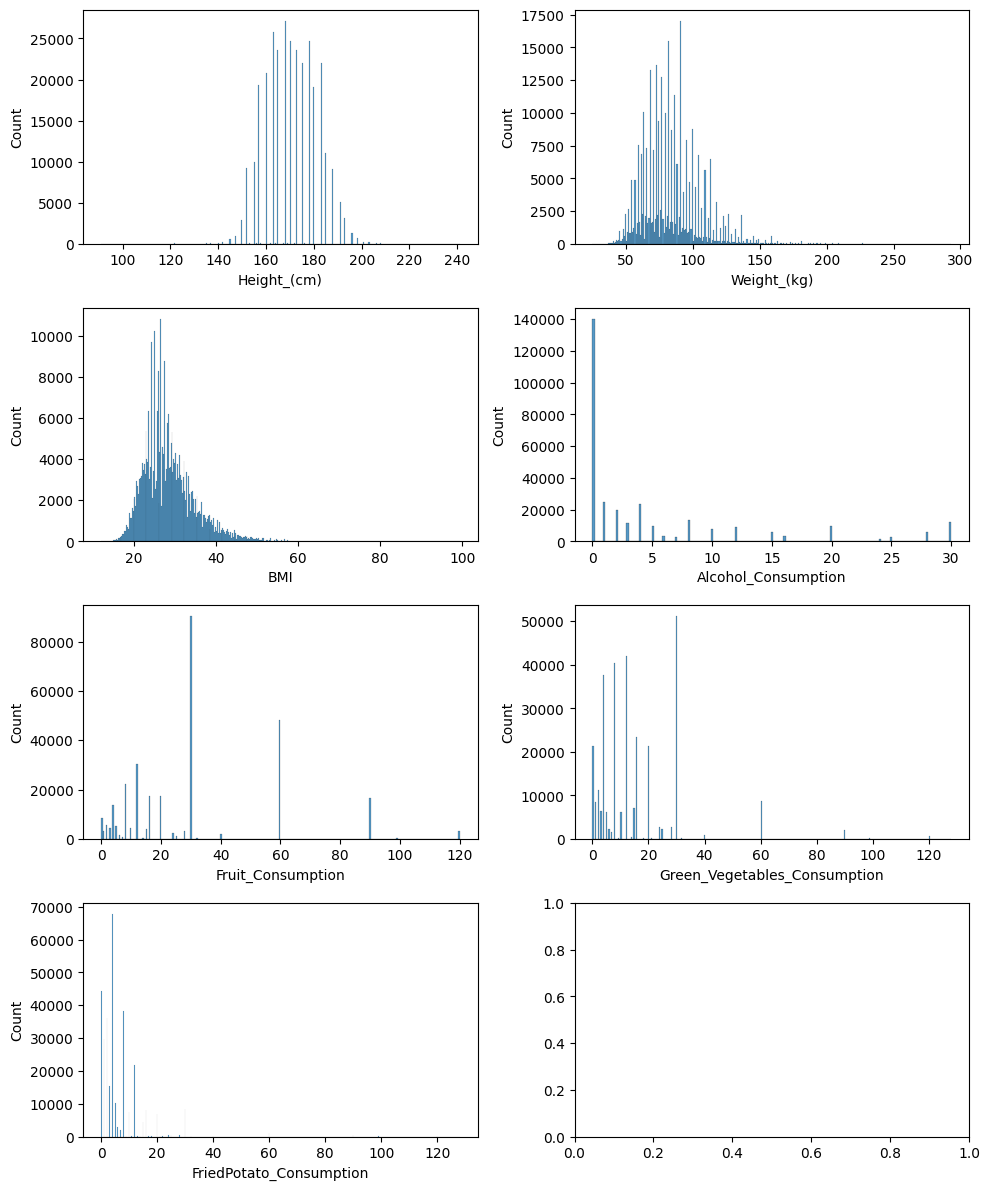

In [ ]:
#set up subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 12))

for i, col in enumerate(numerical_cols):
    row = i // 2 # integer division
    col = i % 2 # get the remainder of i dividing by 2, which will be 0 and 1

    # Plot a histogram for the current numerical column on the appropriate subplot axes
    sns.histplot(num_df[numerical_cols[i]], ax=axs[row, col])

# Adjust the layout of the plots so that there is no overlap and labels and titles are clearly visible.
plt.tight_layout()
plt.show()

**Takeaways**:

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins. Here we want to explore the distribution of physical index (height, weight, BMI), and lifestyle factors (alcohol consumption, fruit and green vegetable consumption, fried potato consumption)

1. Height and Weight: Both the height and weight distributions show a right-skewed pattern, indicating that a smaller number of individuals have values significantly higher than the mode. The range of heights appears to be approximately 100 to 240 cm, and for weight, it's around 0 to 300 kg, which suggests possible outliers or errors as these ranges are biologically extreme.

2. BMI: The BMI distribution is also right-skewed but has a peak around 20 to 30, which falls within the normal range according to standard BMI categories. The tail extending to the right suggests that there is a subset of the population with a higher BMI, indicative of overweight or obesity.

3. Alcohol Consumption: The distribution for alcohol consumption is heavily skewed to the right, with most of the population consuming between 0 to 5 units (assuming a reasonable scale for consumption), and a very small number consuming more.

4. Fruit and Green Vegetable Consumption: Both fruit and green vegetable consumption show a high frequency of low consumption values with long tails to the right, indicating that while most individuals consume these in small quantities, a few consume a lot more. This could suggest a lack of regular fruit and green vegetable intake among the broader population.

5. Fried Potato Consumption: Similar to fruit and green vegetable consumption, fried potato consumption is skewed right, with most individuals consuming lower amounts. However, the distribution appears to have multiple peaks, suggesting the presence of different consumption habits within the population.




Distribution of each categorical variable

In [ ]:
# select the categorical data
cat_df = temp.select_dtypes(include='object')

# check the name of all the categorical columns
category_cols = cat_df.columns.tolist()
print(category_cols)

['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']


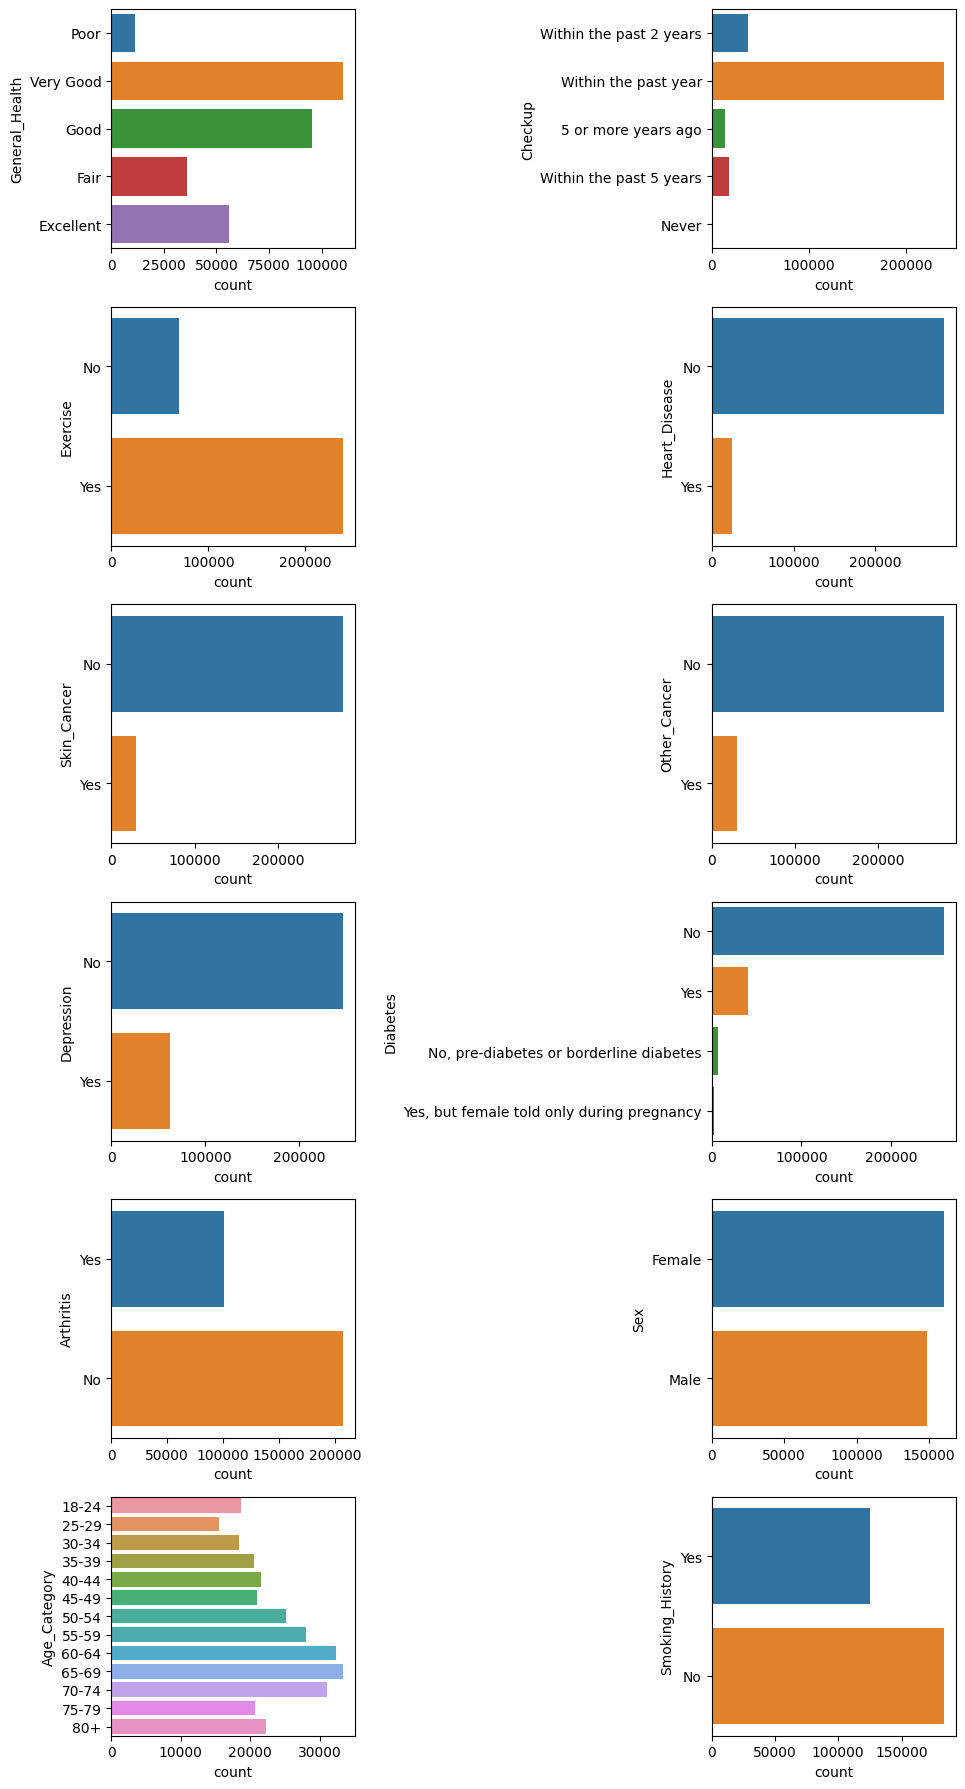

In [ ]:
# check the distribution of categorical data

fig, axs = plt.subplots(6, 2, figsize=(10, 18))
for i, col in enumerate(category_cols):
    row = i // 2
    col = i % 2

    # when the column is age category
    if i==10:
      sns.countplot(y=cat_df[category_cols[i]], ax=axs[row, col],order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'])

    # other columns
    else:
      sns.countplot(y=cat_df[category_cols[i]], ax=axs[row, col])


plt.tight_layout()
plt.show()

**Takeaways**: Here we want to expolre the distribution of categorical data including general health, frequency of visiting a doctor, diseases, gender, age groups and smoking.

1. Checkup: Most people visited their doctor for a routine checkup last year.

2. Exercise: Most people do some exercises or participated in physical activities during last month.

3. Diseases: A large majority do not have heart disease, skin cancer or other cancer, diabetes, arthritis and depression.

4. Gender: The number of men and women participated in this dataset is almost evenly distributed.

5. Age distribution: The age distribution shows that the younger age groups (18-24, 25-29) have the lowest counts, with numbers generally increasing up to the 55-59 age group before gradually declining in the older age categories.

#### 2.1.4.2 Comparison of every variable with heart disease or without heart disease

Comparison in distribution of numerical variable with and without heart disease

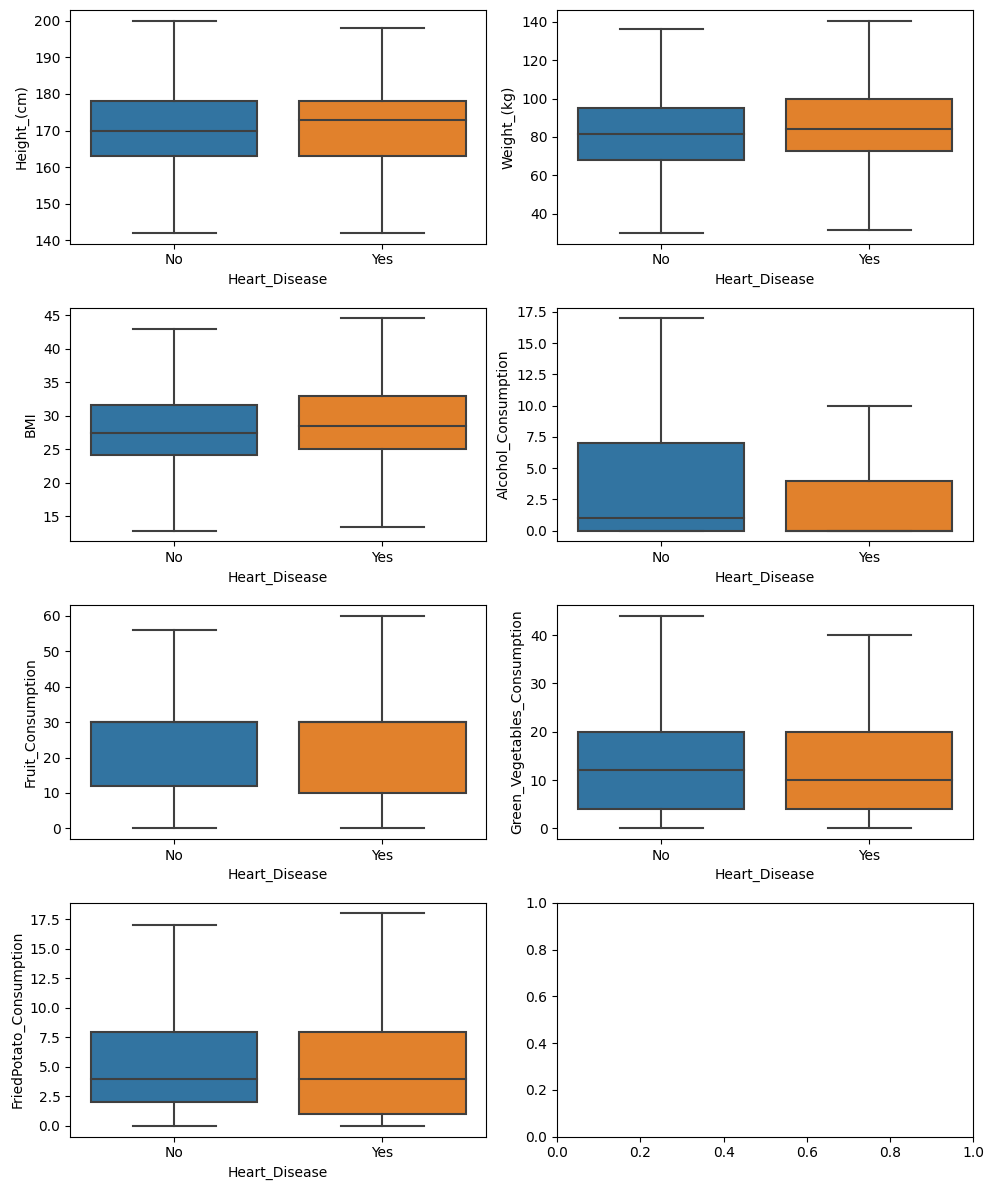

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(10, 12))

# draw boxplots over physical indices and lifestyle factors on whether people have heart disease
for i, col in enumerate(numerical_cols):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df['Heart_Disease'],y=df[numerical_cols[i]], ax=axs[row, col], showfliers=False)

plt.tight_layout()
plt.show()

**Takeaways**:

A boxplot graphically demonstrates the locality, spread and skewness groups of numerical data through their quartiles. It displays 5 numbers: minimum, first quartile or 25th percentile, medium, third quartile or 75th percentile, and maximum. The height of the box shows interquartile range (IQR), which is the result of 75th percentile minus 25th percentile.

Here we want to compare physical indices and lifestyles of those people with heart disease and those without heart disease.

1. Height: The median height appears similar for individuals with and without heart disease, and there is a considerable overlap in the interquartile ranges (IQRs). This suggests that height may not be a distinguishing factor between the two groups.

2. Weight: The median weight for individuals with heart disease seems slightly higher than for those without, and the spread of the data is also slightly larger for those with heart disease. This indicates that weight could be associated with the presence of heart disease.

3. BMI: There is a difference in BMI between the two groups. Individuals with heart disease have a higher median BMI, and the IQR is also higher, suggesting an association between higher BMI and the presence of heart disease.

4. Alcohol Consumption: The median alcohol consumption for those with heart disease is slightly higher than for those without. The IQR for those with heart disease is broader, suggesting more variability in alcohol consumption among individuals with heart disease.

5. Fruit Consumption: Individuals without heart disease seem to have a slightly higher median fruit consumption, though the difference is not substantial. The IQRs are similar, indicating similar variability in fruit consumption between the two groups.

6. Green Vegetable Consumption: Both medians and IQRs are similar for green vegetable consumption between the two groups. This suggests that green vegetable consumption may not differ significantly between individuals with and without heart disease.

7. Fried Potato Consumption: The boxplot shows a higher median fried potato consumption for individuals with heart disease. The IQR is also slightly larger for the heart disease group, which could imply a correlation between fried potato consumption and heart disease.


Comparison in distribution of categorical variable with and without heart disease

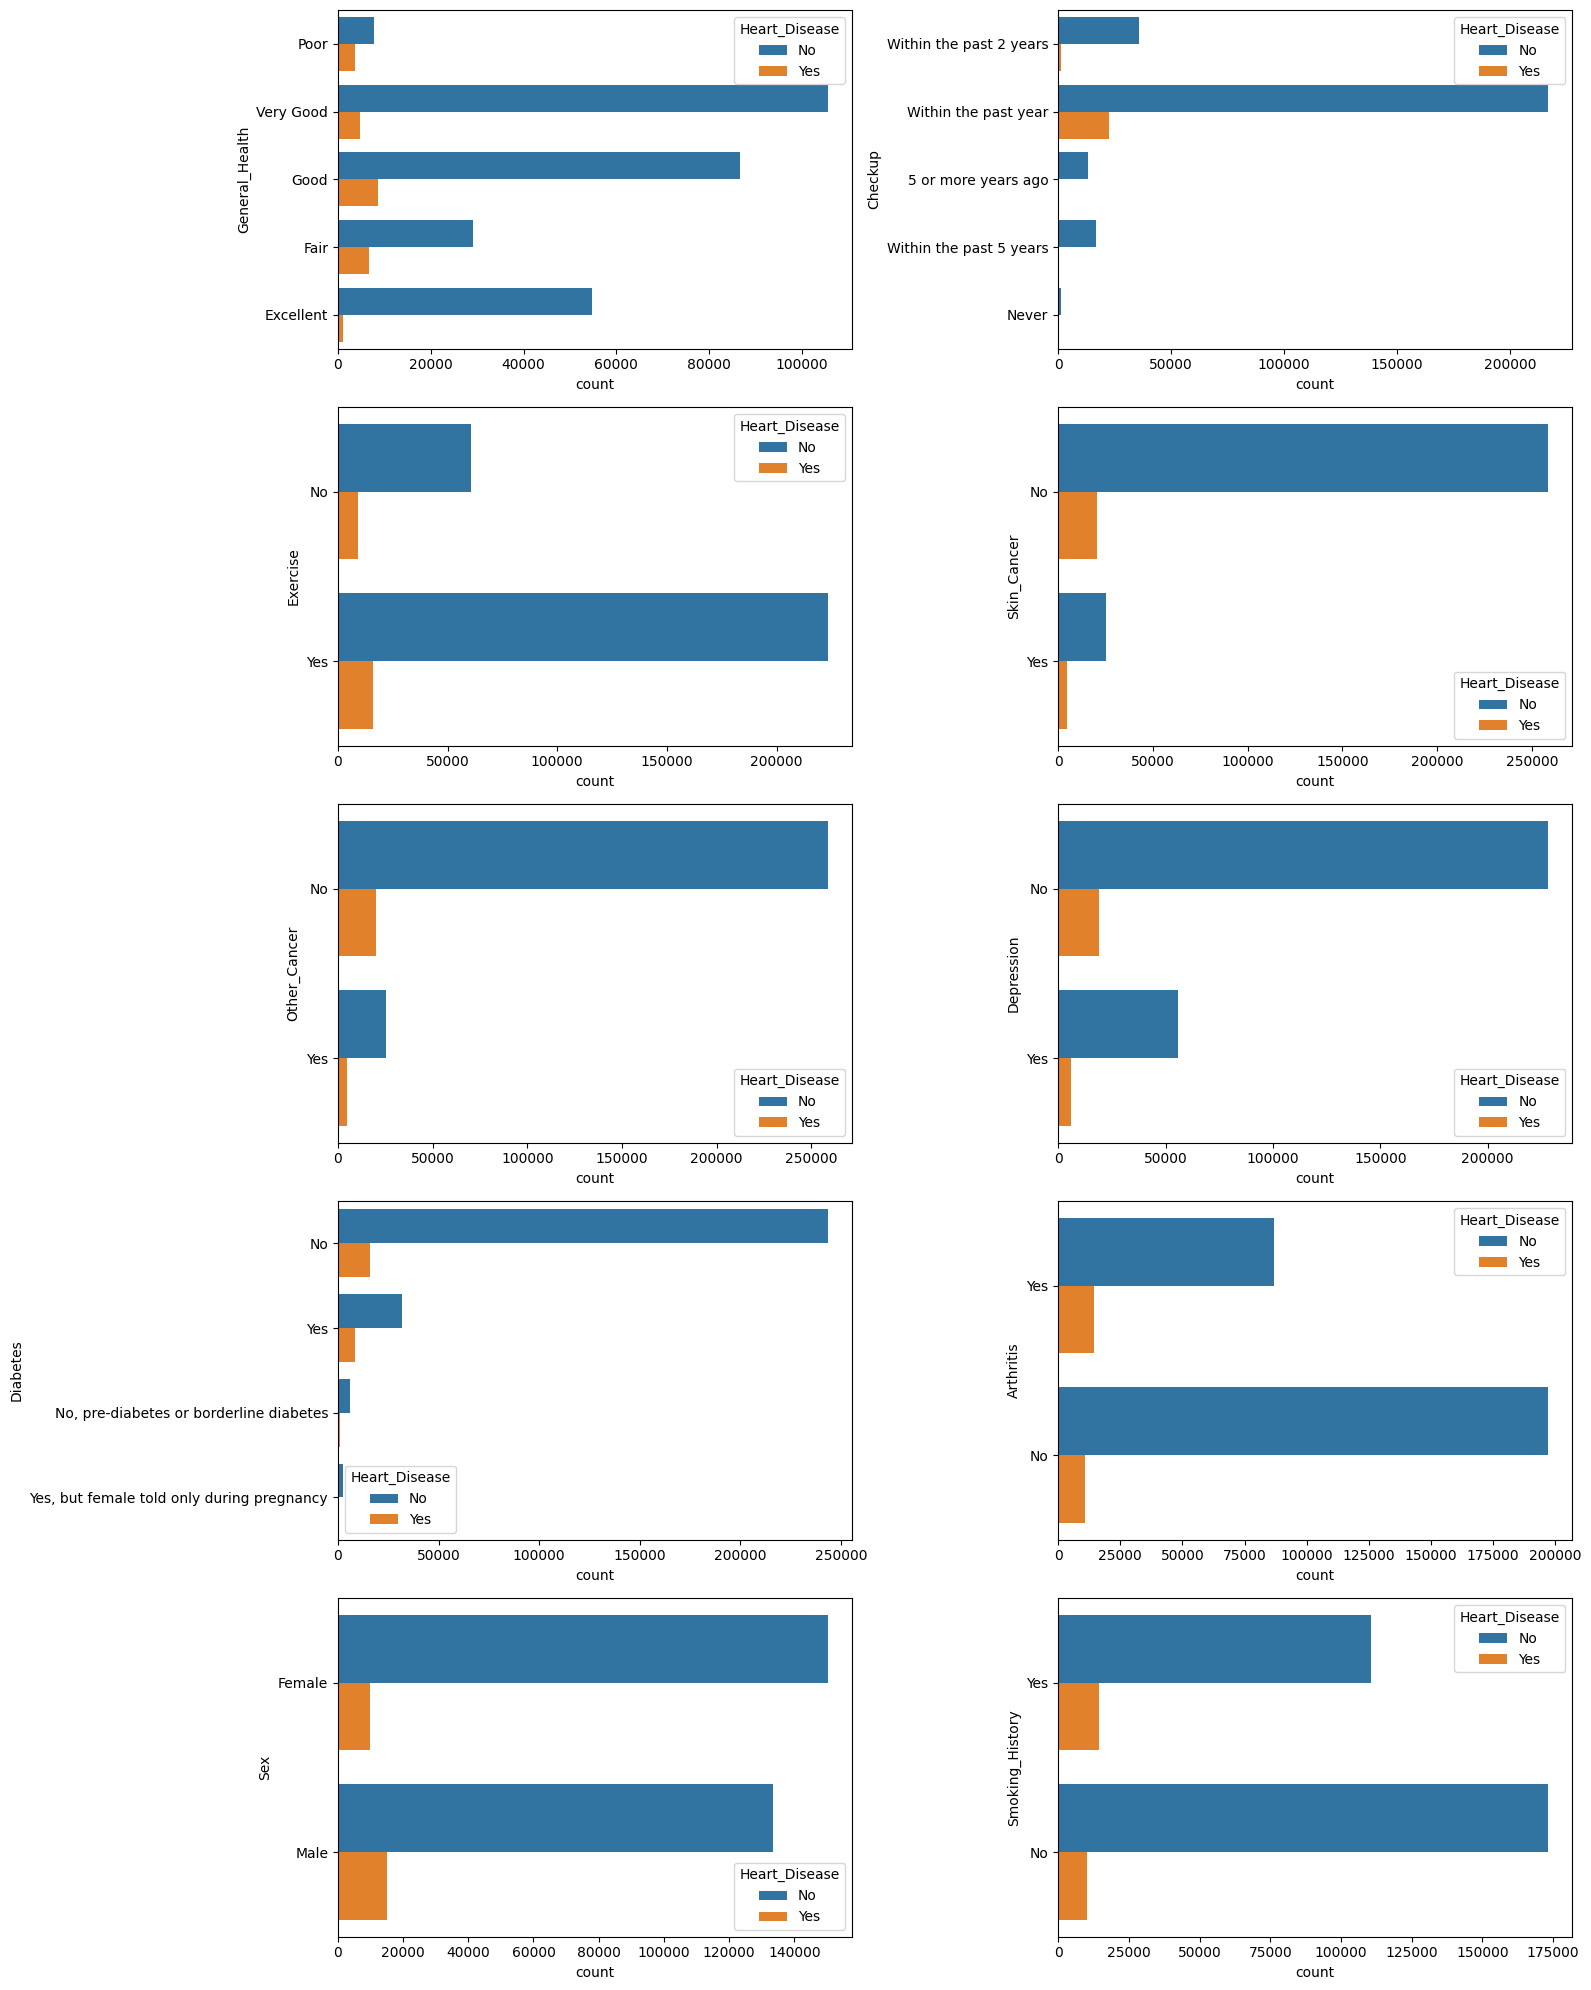

In [ ]:
# compare the number of people with and without heart disease across different categories
fig, axs = plt.subplots(5, 2, figsize=(16, 20))

n=0 # set a figure index

for i, col in enumerate(category_cols):
    # leave out 'Heart_Disease' and 'Age_Category'
    if (i != 3)&(i!=10):
      row = n // 2
      col = n % 2
      sns.countplot(y=cat_df[category_cols[i]],hue=cat_df[category_cols[3]], ax=axs[row, col])
      n += 1

plt.tight_layout()
plt.show()

**Takeaways**: we want to compare the number of people with and without heart disease across different categories.

1. General Health: Individuals without heart disease predominantly report their health as "Very Good" and "Good." There are relatively few individuals with heart disease reporting "Very Good" or "Good" health. Notably, those with heart disease are more represented in the "Fair" and "Poor" health categories.

2. Checkup Frequency: Most individuals, regardless of having heart disease or not, seem to have had a checkup within the past year. However, individuals with heart disease appear more likely to have had recent checkups compared to those without heart disease.

3. Exercise: A significant number of individuals without heart disease engage in exercise, while those with heart disease are less likely to exercise.

4. Skin Cancer: Individuals without heart disease significantly outnumber those with heart disease in both categories. The presence of skin cancer is less common among individuals with heart disease.

5. Depression: Individuals with heart disease are more likely to experience depression compared to those without.

6. Diabetes: Diabetes is more prevalent among individuals with heart disease. A notable number of individuals with heart disease have diabetes, compared to a smaller count among those without. The category of "Yes, but female told only during pregnancy" is relatively low and shows a smaller proportion of individuals with heart disease.

7. Sex: The distribution of heart disease is higher among males compared to females.

8. Smoking History: Individuals with a history of smoking are more likely to have heart disease compared to those who have never smoked.


Check the categorical variable with heart disease

In [ ]:
# select data with heart disease
df_heart_dis = df[df['Heart_Disease']=='Yes']
df_heart_dis.shape[0], df_heart_dis.shape[0]/df.shape[0]

(24971, 0.08087144643007507)

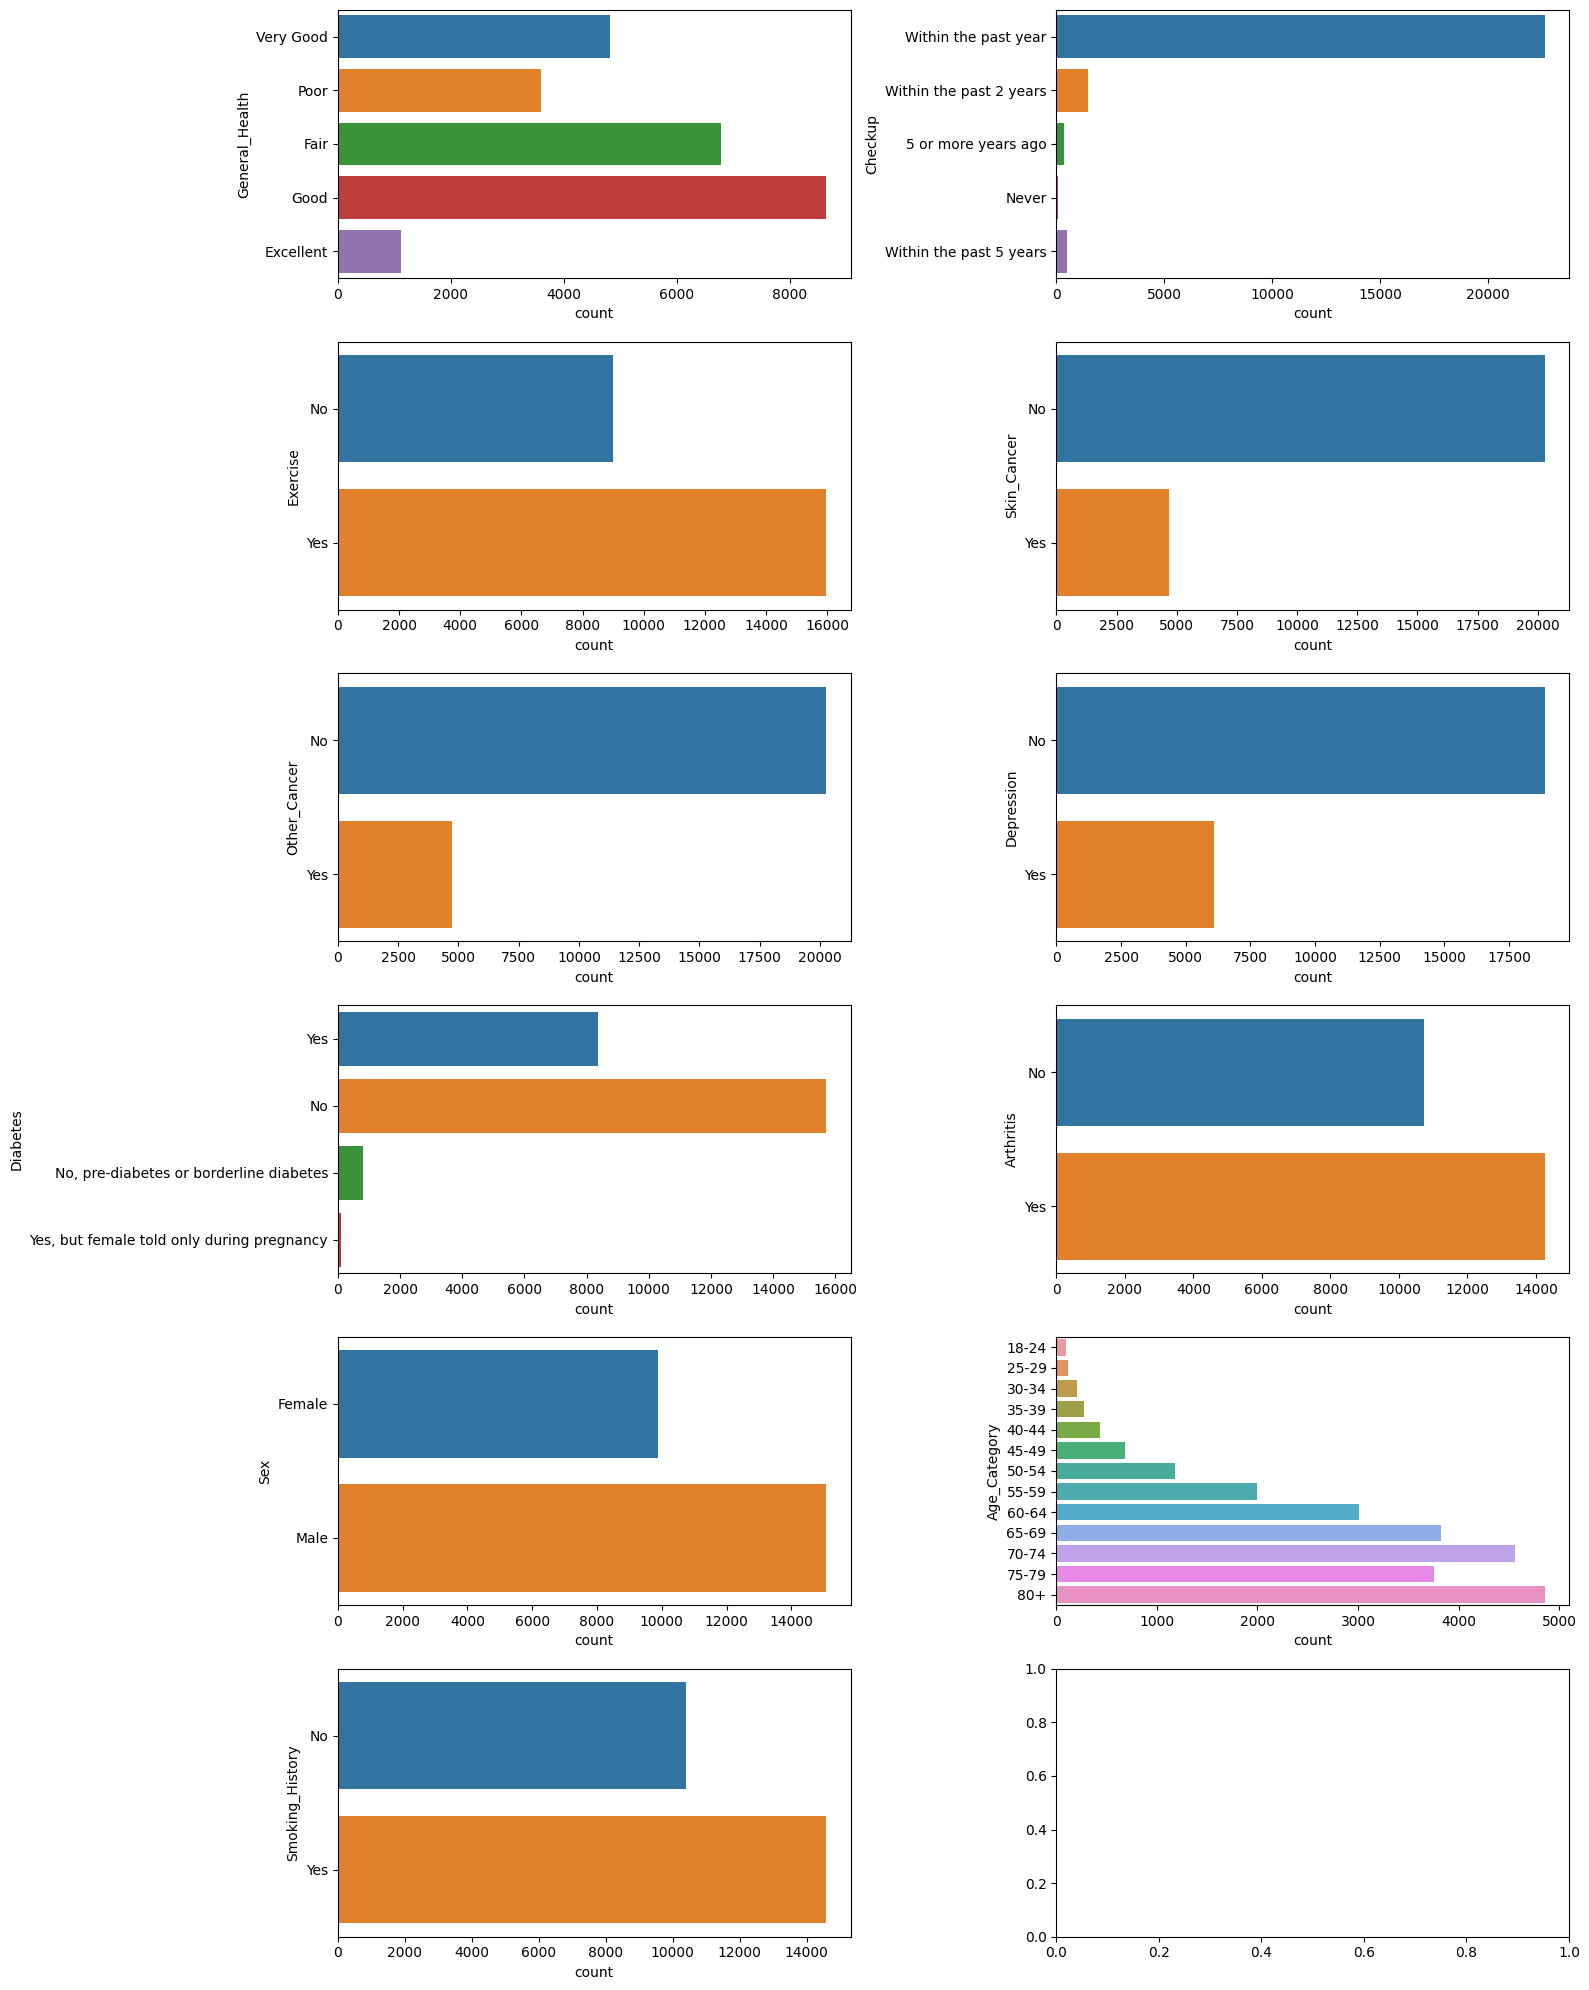

In [ ]:
fig, axs = plt.subplots(6, 2, figsize=(16, 20))
n=0
for i, col in enumerate(category_cols):

    # leave out column 'Heart_Disease'
    if (i != 3)&(i!=10):
      row = n // 2
      col = n % 2
      sns.countplot(y=df_heart_dis[category_cols[i]], ax=axs[row, col])
      n+=1

    # plot distribution of age groups with heart disease
    if i == 10:
      row = n // 2
      col = n % 2
      sns.countplot(y=df_heart_dis[category_cols[i]], ax=axs[row, col],
                    order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
                    )
      n+=1

plt.tight_layout()
plt.show()

**Takeaways**: We want to focus on the people who have heart disease. In this dataset, only 8% of data is with heart disease, which is significantly uneven or say imbalanced.

1. General Health: People with heart disease tend to report their health condition as 'Good' or 'Fair'.

2. Checkup: A large majority of people with heart disease visited their doctor for a checkup within past year. This could be due to people who have diseases are more proactive for health maintenance.

3. Exercise: The number of people with heart disease who do exercise is more than those who don't exercise.

4. Skin cancer, other cancer, depression: Most people with heart disease do not have these diseases, which might indicate that there is small correlation between these diseases and heart disease.

5. Diabetes: The incidence of diabetes is higher in individuals with heart disease. There is also a small subset of females who have been told they have diabetes only during pregnancy, and this group appears to have a lower prevalence of heart disease.

6. Sex: The male population has a higher prevalence of heart disease compared to the female population.

7. Smoking history: People with heart disease are more likely to have smoking history than to have no smoking history.

8. Age category: The prevalence of heart disease significantly increases with age.

#### 2.1.4.3 Multivariable correlation heatmap

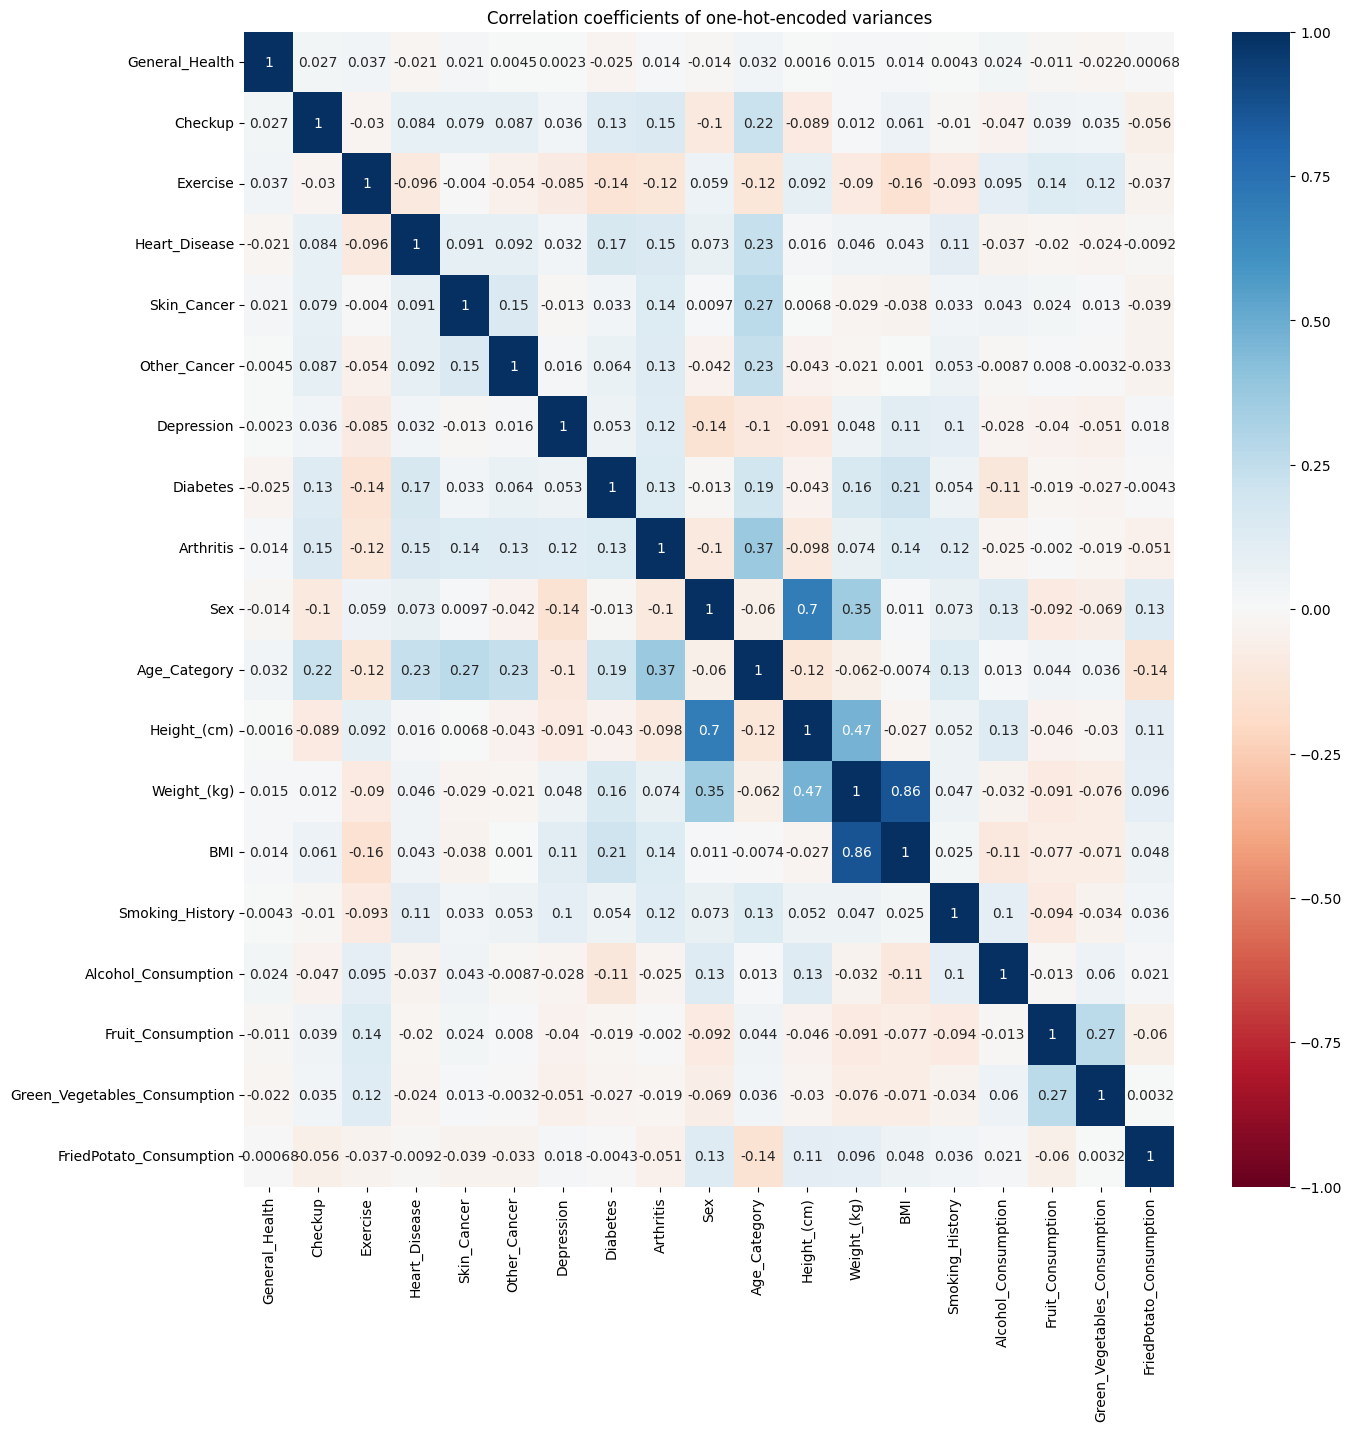

In [ ]:
cat_df_encode = df.copy()
for col in cat_df:
  cat_df_encode[col] = cat_df_encode[col].astype('category').cat.codes
  # print(cat_df_encode[col].unique())

# print(cat_df_encode.n())
corr_mat_all = cat_df_encode.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat_all,annot=True,cmap="RdBu",vmin=-1,vmax=1)
plt.title('Correlation coefficients of one-hot-encoded variances')
plt.show()

**Takeaways**: The heatmap above shows the correlations between different features in the dataset. Values range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

1. In our study, we observed a strong correlation between weight and BMI (coefficient of 0.86). We included all variables in our Decision Tree (DT) and Random Forest (RF) models, as these models are robust to multicollinearity. However, if our upcoming analysis uses the Linear Regression (LR) model, we will exclude variables with high correlation.

2. Age_Category has a moderate positive correlation with Heart_Disease (0.23), skin cancer (0.27), other cancer (0.23), diabetes (0.19) and arthritis (0.37).

3. Green vegetables consumptions are positively corelated with fruit consumption.

## 2.2 Unsupervised Learning (KMeans)

### 2.2.1 Feature Engineering

In [ ]:
df_temp = df.copy()
categorical_variables = df_temp.drop(['General_Health', "Checkup", "Sex", "Age_Category","Skin_Cancer", "Other_Cancer","Diabetes", "Heart_Disease","Arthritis"], axis=1).select_dtypes(include=['object']).columns

conversion_dict = {'Yes': 1, 'No': 0}

# Apply the mapping to the DataFrame for each categorical column
for variable in categorical_variables:
    if variable in df.columns:
        df_temp[variable] = df_temp[variable].map(conversion_dict)
    else:
        print(f"{variable} does not exist in the DataFrame.")

# Now let's check the DataFrame to confirm the changes
df_temp = df_temp.drop(["General_Health", "Checkup", "Sex", "Age_Category","Skin_Cancer", "Other_Cancer","Diabetes","Heart_Disease","Arthritis"], axis=1)
df_temp


,Exercise,Depression,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,0,0,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,1,0,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,0,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,0,0,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
308769,1,0,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308770,1,0,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308771,1,1,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308772,1,0,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


### 2.2.2 Select the Optimal Number of Cluster

1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


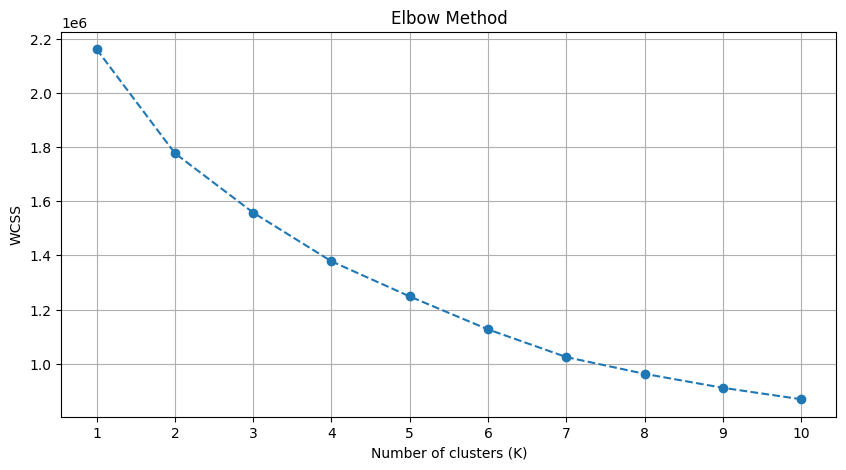

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame 'df' with your data and 'feature_column' as the feature of interest
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[numerical_cols]

# Standardize the features first (important for K-means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_num)
df_numerical= pd.DataFrame(scaled_features, columns=numerical_cols)
df_temp = pd.concat([df_temp[categorical_variables], df_numerical], axis=1)

# Use the elbow method to find the optimal number of clusters, K
wcss = []

# Trying different numbers of clusters (for example, from 1 to 10)
for i in range(1, 11):
    print(i)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### 2.2.3 Train the KMeans Models and Plot the Centroid of Each Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-da053614c6bf>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', len(centroids_df.columns))


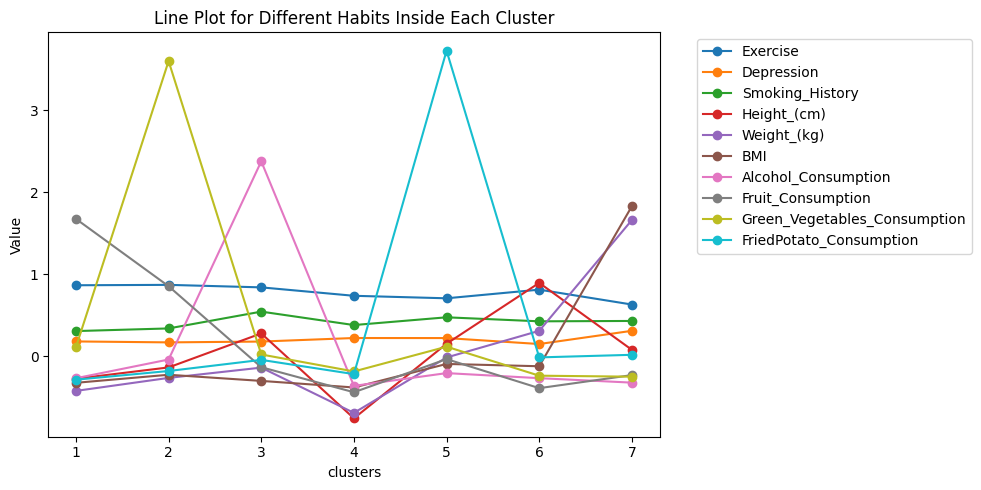

In [ ]:
# Fit KMeans with the optimal number of clusters found
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(df_temp)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df_temp.columns)  # Replace with your actual features

plt.figure(figsize=(10, 5))
# Use a colormap to generate distinct colors
colormap = plt.cm.get_cmap('tab10', len(centroids_df.columns))

# Loop through each column and plot with a distinct color
for i, column in enumerate(centroids_df.columns):
    plt.plot(centroids_df.index+1, centroids_df[column], label=column, marker='o', color=colormap(i))

plt.xlabel('clusters')
plt.ylabel('Value')
plt.title('Line Plot for Different Habits Inside Each Cluster')
plt.xticks(centroids_df.index+1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

df_temp['cluster'] = clusters+1

### 2.2.4 Distribution of General Health In Each Cluster

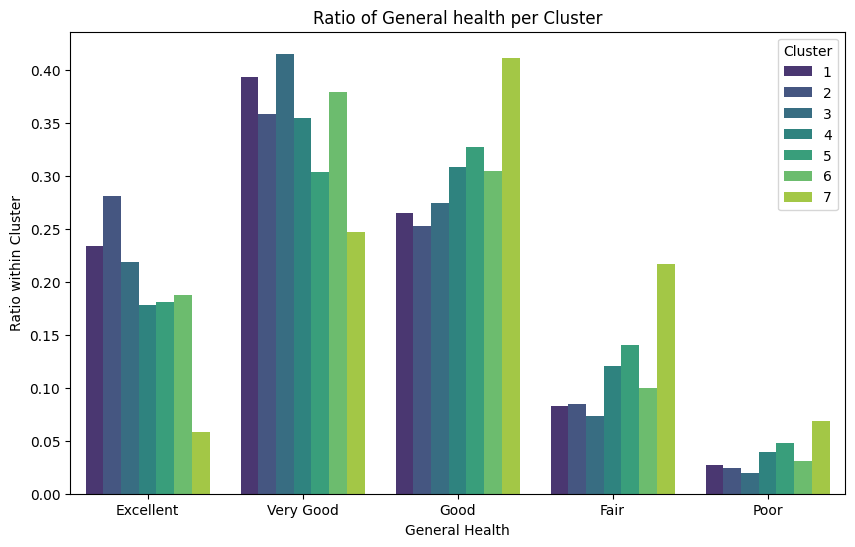

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_temp = pd.concat([df_temp, df[['General_Health', "Checkup", "Sex", "Age_Category","Skin_Cancer", "Other_Cancer","Diabetes","Heart_Disease","Arthritis"]]], axis=1)
# Calculate the counts for each combination of categorical feature and cluster
cluster_category_counts = df_temp.groupby(['cluster', 'General_Health']).size().reset_index(name='count')

# Calculate the total counts for each cluster
cluster_totals = df_temp.groupby('cluster').size().reset_index(name='total')

# Merge the counts with the totals
merged = cluster_category_counts.merge(cluster_totals, on='cluster')
#merged.index = merged.index+1
# Calculate the ratio within each cluster
merged['ratio'] = merged['count'] / merged['total']

order = ["Excellent","Very Good", "Good", "Fair", "Poor"]
# Now plot using seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='General_Health', y='ratio', hue='cluster', data=merged, palette='viridis', order=order)

plt.title('Ratio of General health per Cluster')
plt.xlabel('General Health')
plt.ylabel('Ratio within Cluster')
plt.legend(title='Cluster')
plt.show()


**Takeaways:**
1. Relative to other clusters, the second cluster (Cluster 1) demonstrates the most favorable overall health condition. A closer examination of its centroid reveals that this cluster is characterized by the highest consumption of green vegetables. This observation provides a basis for further exploration into the potential correlation between increased vegetable consumption and enhanced health status.

2. Cluster 6 exhibits the poorest general health status compared to other groups. Members of this cluster are notably distinct due to their higher Body Mass Index (BMI) and weight. This finding suggests a possible implication that obesity could adversely affect overall health.

3. One intriguing insight gleaned from the analysis is the observation that individuals in Cluster 2, despite having higher alcohol consumption, maintain an unexpectedly good average health status. This counter-intuitive phenomenon might be explained by the tendency of individuals in poorer health to regulate their alcohol intake more strictly, resulting in a scenario where those currently in good health are the ones who consume more alcohol

### 2.2.5 Distribution of Heart Disease In Each Cluster

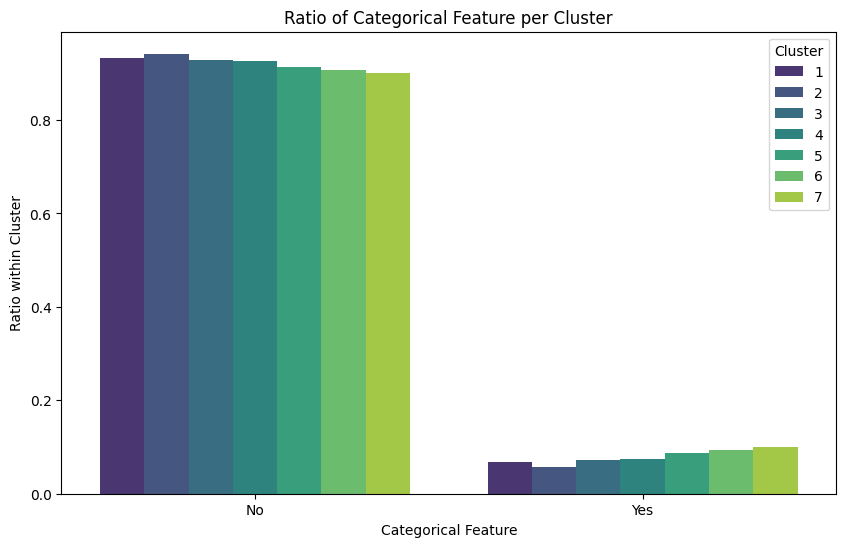

In [ ]:
cluster_category_counts = df_temp.groupby(['cluster', 'Heart_Disease']).size().reset_index(name='count')

# Calculate the total counts for each cluster
cluster_totals = df_temp.groupby('cluster').size().reset_index(name='total')

# Merge the counts with the totals
merged = cluster_category_counts.merge(cluster_totals, on='cluster')

# Calculate the ratio within each cluster
merged['ratio'] = merged['count'] / merged['total']
#merged.index = merged.index+1


# Now plot using seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Heart_Disease', y='ratio', hue='cluster', data=merged, palette='viridis')

plt.title('Ratio of Categorical Feature per Cluster')
plt.xlabel('Categorical Feature')
plt.ylabel('Ratio within Cluster')
plt.legend(title='Cluster')
plt.show()

**Take Away**
1. Cluster 6 contains a higher proportion of individuals with heart disease, suggesting a potential correlation where increased BMI may be associated with a heightened risk of heart disease.

2. Overall, the distribution regarding the prevalence of heart disease does not exhibit notable differences across groups. This implies that the lifestyle habits considered in this analysis may not be primary determinants of heart disease risk.

## 2.3 Supervised Machine Learning (Tree Models)

In this section, we will develop supervised machine learning models that are capable of predicting the occurrence of heart disease based on specific features.

Two key considerations must be addressed in this process:

The dataset is markedly imbalanced, with only 8% of the examples being positive cases of heart disease. This imbalance necessitates the selection or adaptation of algorithms that are robust in handling imbalanced datasets. To address this, we have chosen tree-based methods as our modeling approach, as they are typically effective in such scenarios.

Since our primary objective is to identify individuals potentially at risk of heart disease, our focus will be on maximizing the detection of true positive cases. As a result, we will prioritize recall as our evaluation metric over general accuracy. This approach ensures that our model is more sensitive to identifying individuals with heart disease, which is crucial for this application.










### 2.3.1 Data Preprocessing

In [ ]:
# Read the csv file and save it to a dataframe
df = pd.read_csv("CVD_cleaned.csv")
df.drop_duplicates().reset_index(drop=True)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308770,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308771,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308772,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [ ]:
#Data Preprocessing

categorical_cols = df.drop('Heart_Disease', axis=1).select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)


### 2.3.2 Basic Decision Tree

In [ ]:
# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_preprocessed, y_train)
y_pred = dt_classifier.predict(X_val_preprocessed)
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

#print(best_params)
print("Accuracy:", accuracy)
print(classification_rep)

Accuracy: 0.8615092384734934
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     42538
           1       0.20      0.24      0.22      3790

    accuracy                           0.86     46328
   macro avg       0.57      0.58      0.57     46328
weighted avg       0.87      0.86      0.87     46328



### 2.3.3 Decision Tree with Fine-Tuned Hyperparameters and Adjusted Probability Threshold

In [ ]:
# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_preprocessed, y_train)

# Hyperparameter tuning using GridSearchCV on the validation set
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='recall') ######did grid search based on the recall
grid_search.fit(X_val_preprocessed, y_val)

# Best hyperparameters
best_params = grid_search.best_params_

# Training the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_preprocessed, y_train)

# Evaluating the model on the validation set
y_pred = best_dt_classifier.predict(X_val_preprocessed)
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(classification_rep)


              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42538
           1       0.43      0.07      0.12      3790

    accuracy                           0.92     46328
   macro avg       0.68      0.53      0.54     46328
weighted avg       0.88      0.92      0.89     46328



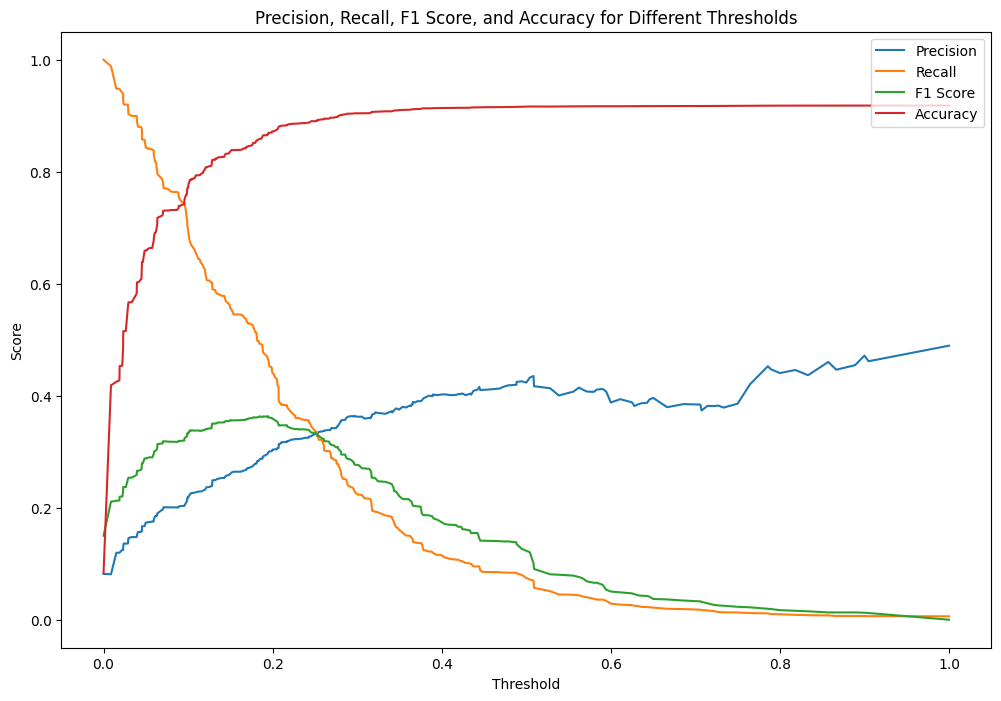

In [ ]:
# Function to calculate metrics for different thresholds
def calculate_metrics_for_thresholds(X, y, model):
    # Getting predicted probabilities for class 1 (Heart Disease) on the dataset
    y_probs = model.predict_proba(X)[:, 1]

    # Calculating precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y, y_probs)

    # Calculating F1 score and accuracy for each threshold
    f1_scores = [f1_score(y, y_probs > thresh) for thresh in thresholds]
    accuracies = [accuracy_score(y, y_probs > thresh) for thresh in thresholds]

    return precision, recall, f1_scores, accuracies, thresholds

# Calculating metrics for different thresholds on the validation set
precision, recall, f1_scores, accuracies, thresholds = calculate_metrics_for_thresholds(X_val_preprocessed, y_val, best_dt_classifier)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score, and Accuracy for Different Thresholds')
plt.legend(loc='best')
plt.show()

In [ ]:
probabilities = best_dt_classifier.predict_proba(X_val_preprocessed)

# Step 2: Choose a threshold (for example, 0.3 based on your analysis)
threshold = 0.17

# Step 3: Apply the threshold
# We use probabilities[:, 1] to get probabilities of the positive class
predictions = (probabilities[:, 1] >= threshold).astype(int)
accuracy = accuracy_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
print(accuracy)
print(classification_rep)

0.844456915903989
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     42538
           1       0.27      0.53      0.36      3790

    accuracy                           0.84     46328
   macro avg       0.61      0.70      0.63     46328
weighted avg       0.90      0.84      0.87     46328



### 2.3.4 Random Forest with Fine-Tuned Hyperparameters and Adjusted Probability Threshold

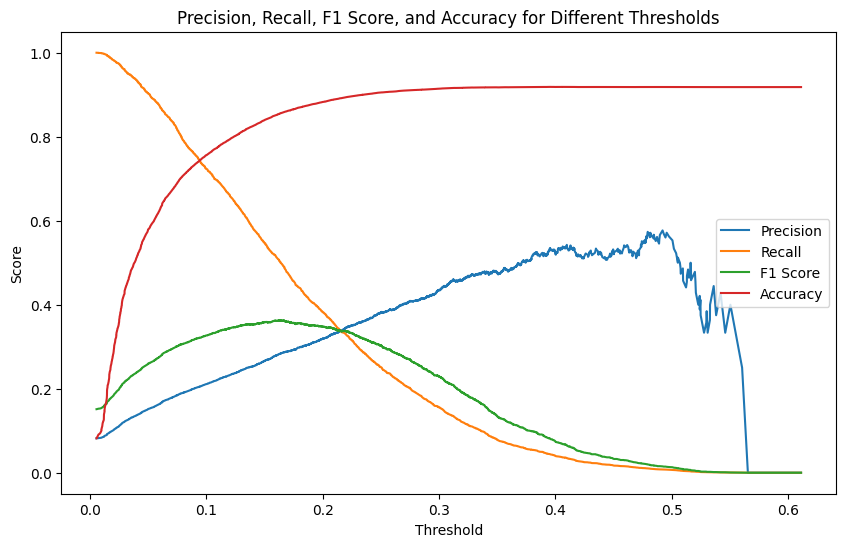

In [ ]:
# Train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

# Hyperparameter Tuning
param_grid_rf = {
'n_estimators': [10, 20, 30],  # Number of trees in the forest
'max_depth': [2, 5, 10],  # Maximum depth of the tree
'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
'bootstrap': [True, False],       # Method of selecting samples for training each tree
}


grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train_preprocessed, y_train)

# Evaluate and Select Threshold
best_rf_classifier = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf_classifier.fit(X_train_preprocessed, y_train)

# Select the best threshold and evaluate

probabilities = best_rf_classifier.predict_proba(X_val_preprocessed)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_val, probabilities)

# Calculate F1 score and accuracy for each threshold
f1_scores = [f1_score(y_val, probabilities > t) for t in thresholds]
accuracies = [accuracy_score(y_val, probabilities > t) for t in thresholds]

# Plotting precision, recall, F1 score, and accuracy for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score, and Accuracy for Different Thresholds')
plt.legend()
plt.show()


In [ ]:
probabilities = best_rf_classifier.predict_proba(X_val_preprocessed)

# Step 2: Choose a threshold (for example, 0.3 based on your analysis)
threshold = 0.15

# Step 3: Apply the threshold
# We use probabilities[:, 1] to get probabilities of the positive class
predictions = (probabilities[:, 1] >= threshold).astype(int)
accuracy = accuracy_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
print(accuracy)
print(classification_rep)

0.8398592643757555
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     42538
           1       0.27      0.55      0.36      3790

    accuracy                           0.84     46328
   macro avg       0.61      0.71      0.63     46328
weighted avg       0.90      0.84      0.86     46328



### 2.3.5 DownSampling the Original Data Before Applying Random Forest

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_preprocessed, y_train)


In [ ]:
########Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Hyperparameter Tuning
param_grid_rf = {
'n_estimators': [10, 20, 30],  # Number of trees in the forest
'max_depth': [2, 5, 10],  # Maximum depth of the tree
'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
'bootstrap': [True, False],       # Method of selecting samples for training each tree
'class_weight': ['balanced', None] # Weights associated with classes in case of imbalanced dataset
}

grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Evaluate and Select Threshold
best_rf_classifier = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = best_rf_classifier.predict(X_val_preprocessed)
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)
cm = confusion_matrix(y_pred, y_val)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.97      0.71      0.82     42538
           1       0.19      0.78      0.31      3790

    accuracy                           0.72     46328
   macro avg       0.58      0.75      0.57     46328
weighted avg       0.91      0.72      0.78     46328



### 2.3.6 Essemble Learning (XGBoost)

In [ ]:
param_grid = {
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'eta': [0.01, 0.1, 0.2],
    'tree_method': ['hist'],  # Set to 'hist'
    'device': ['cuda']        # Add this line for GPU usage
}

scale_pos_weight = len([y for y in y_train if y == 0]) / len([y for y in y_train if y == 1])

xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=3, verbose=3)

grid_search.fit(X_train_preprocessed, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_val_preprocessed)

# Evaluate the model
print(classification_report(y_val, predictions))



Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:27:31] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.98      0.72      0.83     42538
           1       0.20      0.80      0.33      3790

    accuracy                           0.73     46328
   macro avg       0.59      0.76      0.58     46328
weighted avg       0.91      0.73      0.79     46328



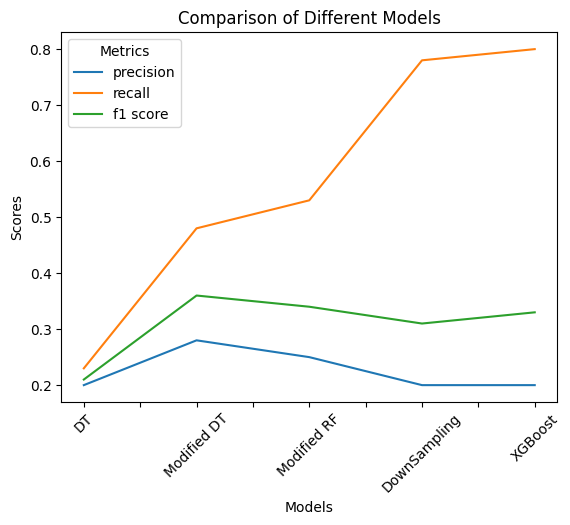

In [ ]:
result = { "precision":[0.2, 0.28, 0.25, 0.2, 0.2], "recall": [0.23, 0.48, 0.53, 0.78, 0.80], "f1 score":[0.21, 0.36, 0.34, 0.31, 0.33]}
x_label = ["DT", "Modified DT", "Modified RF", "DownSampling", "XGBoost"]

df = pd.DataFrame(result, index=x_label)

# Plotting
df.plot()
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Different Models')
plt.legend(title='Metrics')
plt.show()

### 2.3.7 Get the Test Result

In [ ]:
predictions = best_model.predict(X_test_preprocessed)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83     42563
           1       0.20      0.80      0.32      3766

    accuracy                           0.73     46329
   macro avg       0.59      0.76      0.58     46329
weighted avg       0.91      0.73      0.79     46329



### 2.3.8 Get the feature importance from the selected model

In [ ]:
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols).tolist() + numerical_cols.tolist()
importances = best_model.feature_importances_

feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Mapping one-hot encoded features back to the original features
feature_importances_df['original_feature'] = feature_importances_df['feature'].apply(lambda x: x.split('_')[0] if '_' in x else x)

# Aggregating importance scores
aggregated_importances = feature_importances_df.groupby('original_feature')['importance'].sum().reset_index()

# Sorting by importance
aggregated_importances = aggregated_importances.sort_values('importance', ascending=False)

print(aggregated_importances)

   original_feature  importance
0               Age    0.469032
4           Checkup    0.115743
7          Exercise    0.073909
14              Sex    0.065125
5        Depression    0.048999
9             Fruit    0.047079
11            Green    0.032927
1           Alcohol    0.031731
3               BMI    0.029490
17           Weight    0.019277
8       FriedPotato    0.015471
16          Smoking    0.014816
10          General    0.014310
6          Diabetes    0.014032
2         Arthritis    0.005123
13            Other    0.002937
12           Height    0.000000
15             Skin    0.000000


**Take Away**:
1. **Model Selection**: After careful evaluation, we have chosen XGBoost as our final model due to its superior performance on the validation set, particularly its high recall of 0.8. This metric is crucial for our analysis, especially given the highly imbalanced nature of the dataset.

2. **Testing and Generalization**: When applied to the test set, which had not been used previously in our model training or selection process, the XGBoost model maintained a high recall rate of 0.79. This result is quite satisfying and suggests that our model possesses a strong ability to generalize. This is particularly significant in the context of our imbalanced dataset, indicating the model's effectiveness in correctly identifying the positive class.

3. **Insights from Feature Importance**: An analysis of feature importance revealed that the top three contributing factors are subject features. This finding aligns with our earlier observations from unsupervised learning, which indicated that living habits in our dataset might not be as crucial in influencing heart disease.

# **Part 3 - Potential Future Work**


Our potential future work is highlighted in the yellow part of the following photograph.

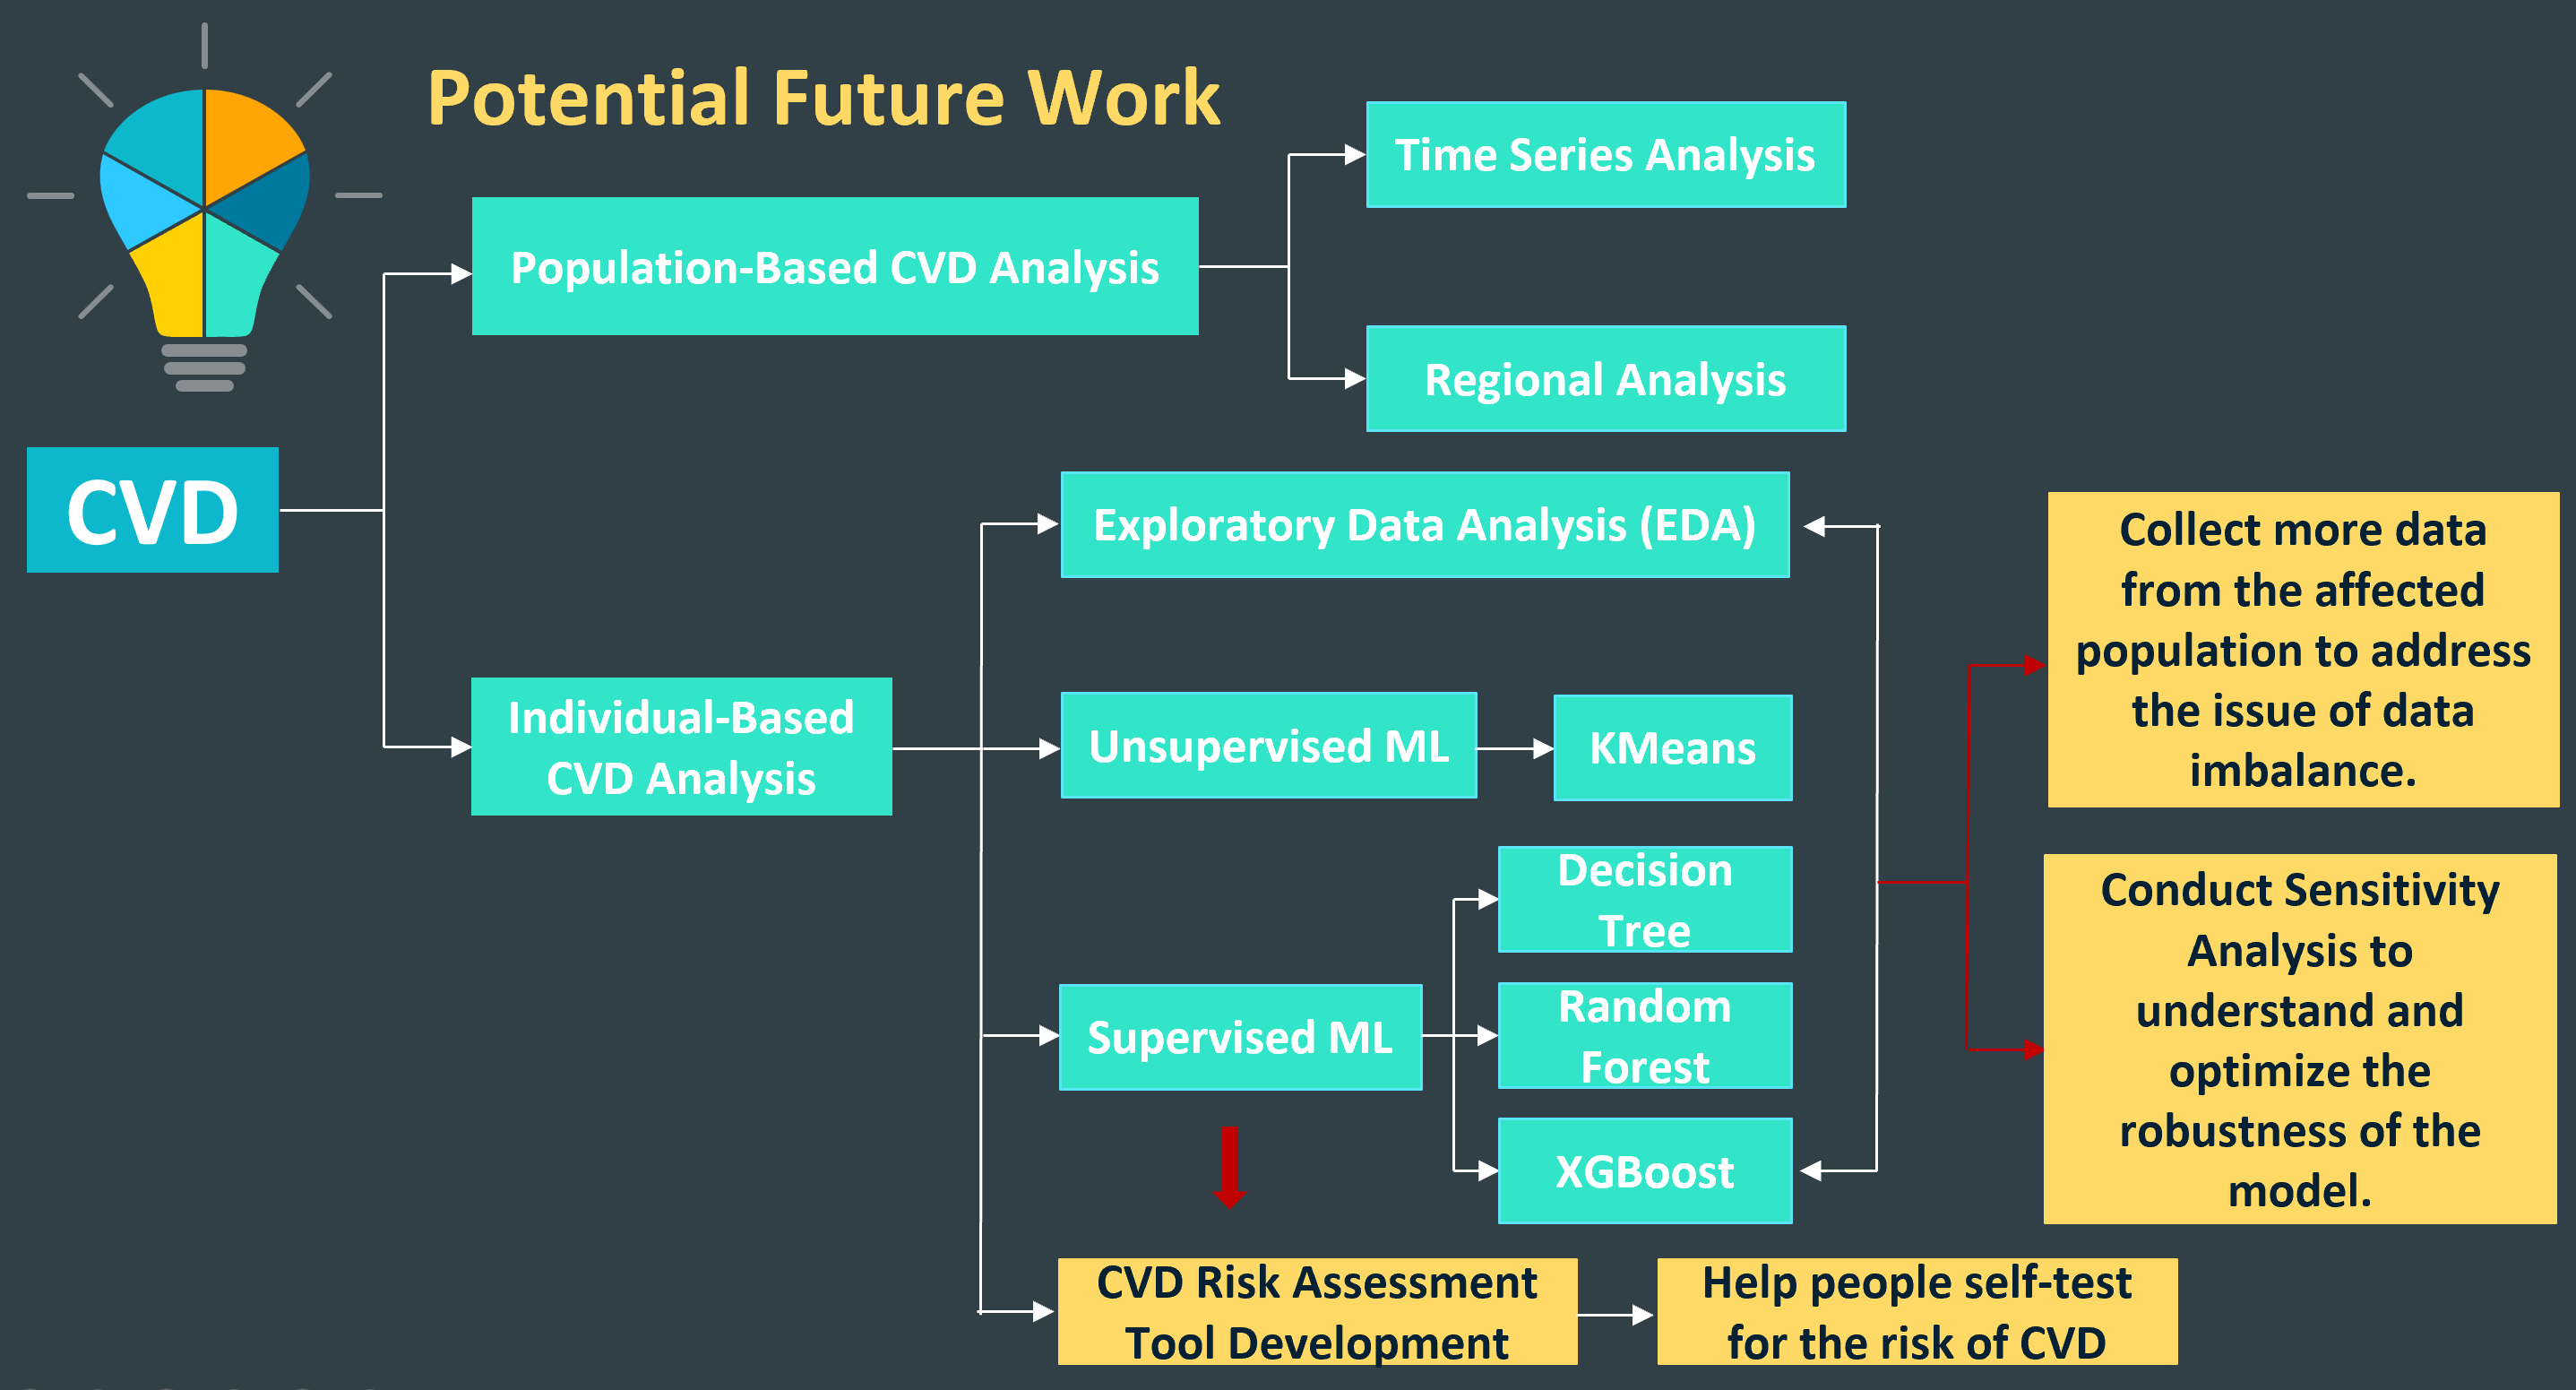

**Take Away**
1. We would like to collect mroe data, particularly from people with CVD. This can help us address the issue of imbalance data and gain a more comprehensive understanding of the CVD.

2. We also want to conduct a sensitivity analysis. This will help us understand and enhance the model's robustness. Additionally, we aim to investigate the key factors influencing CVD from a statistical standpoint.

3. We're looking forward to developing a CVD risk assessment tool, possibly in the form of a webpage. This tool would allow users to input their data and receive feedback based on our model, aiding in self-assessment of CVD risk. Importantly, we'll focus on ensuring the safety and security of the collected data to protect user privacy.